##LIBRERÍAS Y PAQUETES

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [ ]:
#Importación de las librerías necesarias para el acceso y obtención a los archivos de Gooogle Drive
from google.colab import auth
from google.colab import drive
from google.auth import default
auth.authenticate_user()
creds, _ = default()
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


#LIMPIEZA DE DATOS (Primera Parte: Delitos)

In [ ]:
delitos_2015 = pd.read_excel('/content/gdrive/MyDrive/Colab Notebooks/INCIDENCIA DELICTIVA-ASE I/2015.xlsx')

In [ ]:
delitos_2015

,Año,Clave_Ent,Entidad,Cve. Municipio,Municipio,Bien jurídico afectado,Tipo de delito,Subtipo de delito,Modalidad,Enero,...,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre
0,2015,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con arma de fuego,2,...,1,1,0,1,1,0,2,1,0,1
1,2015,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con arma blanca,1,...,0,0,0,1,0,1,0,0,0,0
2,2015,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con otro elemento,0,...,1,1,3,2,0,1,2,0,0,0
3,2015,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,No especificado,1,...,0,1,0,0,0,0,0,0,0,0
4,2015,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio culposo,Con arma de fuego,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189233,2015,32,Zacatecas,32058,Santa María de la Paz,Otros bienes jurídicos afectados (del fuero co...,Falsificación,Falsificación,Falsificación,0,...,0,0,0,0,0,0,0,0,0,0
189234,2015,32,Zacatecas,32058,Santa María de la Paz,Otros bienes jurídicos afectados (del fuero co...,Contra el medio ambiente,Contra el medio ambiente,Contra el medio ambiente,0,...,0,0,0,0,0,0,0,0,0,0
189235,2015,32,Zacatecas,32058,Santa María de la Paz,Otros bienes jurídicos afectados (del fuero co...,Delitos cometidos por servidores públicos,Delitos cometidos por servidores públicos,Delitos cometidos por servidores públicos,0,...,0,0,0,0,0,0,0,0,0,0
189236,2015,32,Zacatecas,32058,Santa María de la Paz,Otros bienes jurídicos afectados (del fuero co...,Electorales,Electorales,Electorales,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
delitos_2015.shape

(189238, 21)

In [ ]:
delitos_2016 = pd.read_excel('/content/gdrive/MyDrive/Colab Notebooks/INCIDENCIA DELICTIVA-ASE I/2016.xlsx')

In [ ]:
delitos_2016

,Año,Clave_Ent,Entidad,Cve. Municipio,Municipio,Bien jurídico afectado,Tipo de delito,Subtipo de delito,Modalidad,Enero,...,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre
0,2016,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con arma de fuego,0,...,2,1,1,0,0,0,2,1,0,2
1,2016,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con arma blanca,0,...,0,1,1,0,0,1,2,3,0,0
2,2016,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con otro elemento,0,...,5,0,0,1,0,0,0,0,0,1
3,2016,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,No especificado,0,...,0,0,0,0,0,0,0,0,0,0
4,2016,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio culposo,Con arma de fuego,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189233,2016,32,Zacatecas,32058,Santa María de la Paz,Otros bienes jurídicos afectados (del fuero co...,Falsificación,Falsificación,Falsificación,0,...,0,0,0,0,0,0,0,0,0,0
189234,2016,32,Zacatecas,32058,Santa María de la Paz,Otros bienes jurídicos afectados (del fuero co...,Contra el medio ambiente,Contra el medio ambiente,Contra el medio ambiente,0,...,0,0,0,0,0,0,0,0,0,0
189235,2016,32,Zacatecas,32058,Santa María de la Paz,Otros bienes jurídicos afectados (del fuero co...,Delitos cometidos por servidores públicos,Delitos cometidos por servidores públicos,Delitos cometidos por servidores públicos,0,...,0,0,0,0,0,0,0,0,0,0
189236,2016,32,Zacatecas,32058,Santa María de la Paz,Otros bienes jurídicos afectados (del fuero co...,Electorales,Electorales,Electorales,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
delitos_2016.shape

(189238, 21)

In [ ]:
delitos_2017 = pd.read_excel('/content/gdrive/MyDrive/Colab Notebooks/INCIDENCIA DELICTIVA-ASE I/2017.xlsx')

In [ ]:
delitos_2017

,Año,Clave_Ent,Entidad,Cve. Municipio,Municipio,Bien jurídico afectado,Tipo de delito,Subtipo de delito,Modalidad,Enero,...,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre
0,2017,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con arma de fuego,0,...,0,2,3,3,0,3,3,3,3,2
1,2017,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con arma blanca,1,...,0,1,0,2,0,1,0,2,0,0
2,2017,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con otro elemento,0,...,2,1,4,4,2,1,3,2,1,1
3,2017,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,No especificado,0,...,0,0,0,0,0,0,0,0,0,0
4,2017,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio culposo,Con arma de fuego,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241663,2017,32,Zacatecas,32058,Santa María de la Paz,Otros bienes jurídicos afectados (del fuero co...,Falsificación,Falsificación,Falsificación,0,...,0,0,0,0,0,0,0,0,0,0
241664,2017,32,Zacatecas,32058,Santa María de la Paz,Otros bienes jurídicos afectados (del fuero co...,Contra el medio ambiente,Contra el medio ambiente,Contra el medio ambiente,0,...,0,0,0,0,0,0,0,0,0,0
241665,2017,32,Zacatecas,32058,Santa María de la Paz,Otros bienes jurídicos afectados (del fuero co...,Delitos cometidos por servidores públicos,Delitos cometidos por servidores públicos,Delitos cometidos por servidores públicos,0,...,0,0,0,0,0,0,0,0,0,0
241666,2017,32,Zacatecas,32058,Santa María de la Paz,Otros bienes jurídicos afectados (del fuero co...,Electorales,Electorales,Electorales,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
delitos_2017.shape

(241668, 21)

In [ ]:
delitos_2018 = pd.read_excel('/content/gdrive/MyDrive/Colab Notebooks/INCIDENCIA DELICTIVA-ASE I/2018.xlsx')

In [ ]:
delitos_2018

,Año,Clave_Ent,Entidad,Cve. Municipio,Municipio,Bien jurídico afectado,Tipo de delito,Subtipo de delito,Modalidad,Enero,...,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre
0,2018,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con arma de fuego,4,...,3,3,3,1,1,2,4,2,4,3
1,2018,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con arma blanca,1,...,1,0,2,0,0,0,1,0,1,0
2,2018,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con otro elemento,2,...,0,2,2,3,0,1,0,1,0,0
3,2018,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,No especificado,0,...,0,1,0,0,0,0,0,0,0,0
4,2018,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio culposo,Con arma de fuego,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242153,2018,32,Zacatecas,32058,Santa María de la Paz,Otros bienes jurídicos afectados (del fuero co...,Falsificación,Falsificación,Falsificación,0,...,0,0,0,0,0,0,0,0,0,0
242154,2018,32,Zacatecas,32058,Santa María de la Paz,Otros bienes jurídicos afectados (del fuero co...,Contra el medio ambiente,Contra el medio ambiente,Contra el medio ambiente,0,...,0,0,0,0,0,0,0,0,0,0
242155,2018,32,Zacatecas,32058,Santa María de la Paz,Otros bienes jurídicos afectados (del fuero co...,Delitos cometidos por servidores públicos,Delitos cometidos por servidores públicos,Delitos cometidos por servidores públicos,0,...,0,0,0,0,0,0,0,0,0,0
242156,2018,32,Zacatecas,32058,Santa María de la Paz,Otros bienes jurídicos afectados (del fuero co...,Electorales,Electorales,Electorales,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
delitos_2018.shape

(242158, 21)

In [ ]:
delitos_2019 = pd.read_excel('/content/gdrive/MyDrive/Colab Notebooks/INCIDENCIA DELICTIVA-ASE I/2019.xlsx')

In [ ]:
delitos_2019

,Año,Clave_Ent,Entidad,Cve. Municipio,Municipio,Bien jurídico afectado,Tipo de delito,Subtipo de delito,Modalidad,Enero,...,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre
0,2019,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con arma de fuego,5,...,2,2,2,4,2,0,7,6,2,1
1,2019,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con arma blanca,1,...,0,2,2,0,1,0,0,0,2,2
2,2019,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con otro elemento,1,...,2,2,1,1,0,0,0,0,1,1
3,2019,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,No especificado,0,...,0,0,2,0,0,0,0,0,0,0
4,2019,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio culposo,Con arma de fuego,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242153,2019,32,Zacatecas,32058,Santa María de la Paz,Otros bienes jurídicos afectados (del fuero co...,Falsificación,Falsificación,Falsificación,0,...,0,0,0,0,0,0,0,0,0,0
242154,2019,32,Zacatecas,32058,Santa María de la Paz,Otros bienes jurídicos afectados (del fuero co...,Contra el medio ambiente,Contra el medio ambiente,Contra el medio ambiente,0,...,0,0,0,0,0,0,0,0,0,0
242155,2019,32,Zacatecas,32058,Santa María de la Paz,Otros bienes jurídicos afectados (del fuero co...,Delitos cometidos por servidores públicos,Delitos cometidos por servidores públicos,Delitos cometidos por servidores públicos,0,...,0,0,0,0,0,0,0,0,0,0
242156,2019,32,Zacatecas,32058,Santa María de la Paz,Otros bienes jurídicos afectados (del fuero co...,Electorales,Electorales,Electorales,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
delitos_2019.shape

(242158, 21)

In [ ]:
delitos_2020 = pd.read_excel('/content/gdrive/MyDrive/Colab Notebooks/INCIDENCIA DELICTIVA-ASE I/2020.xlsx')

In [ ]:
delitos_2020

,Año,Clave_Ent,Entidad,Cve. Municipio,Municipio,Bien jurídico afectado,Tipo de delito,Subtipo de delito,Modalidad,Enero,...,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre
0,2020,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con arma de fuego,2,...,3,3,2,3,5,2,1,1,1,1
1,2020,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con arma blanca,0,...,2,0,2,0,1,1,0,0,1,0
2,2020,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con otro elemento,1,...,1,0,2,2,1,2,0,2,0,0
3,2020,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,No especificado,0,...,0,0,0,0,0,0,0,0,0,0
4,2020,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio culposo,Con arma de fuego,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242153,2020,32,Zacatecas,32058,Santa María de la Paz,Otros bienes jurídicos afectados (del fuero co...,Falsificación,Falsificación,Falsificación,0,...,0,0,0,0,0,0,0,0,0,0
242154,2020,32,Zacatecas,32058,Santa María de la Paz,Otros bienes jurídicos afectados (del fuero co...,Contra el medio ambiente,Contra el medio ambiente,Contra el medio ambiente,0,...,0,0,0,0,0,0,0,0,0,0
242155,2020,32,Zacatecas,32058,Santa María de la Paz,Otros bienes jurídicos afectados (del fuero co...,Delitos cometidos por servidores públicos,Delitos cometidos por servidores públicos,Delitos cometidos por servidores públicos,0,...,0,0,0,0,0,0,0,0,0,0
242156,2020,32,Zacatecas,32058,Santa María de la Paz,Otros bienes jurídicos afectados (del fuero co...,Electorales,Electorales,Electorales,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
delitos_2020.shape

(242158, 21)

In [ ]:
delitos_2021 = pd.read_excel('/content/gdrive/MyDrive/Colab Notebooks/INCIDENCIA DELICTIVA-ASE I/2021.xlsx')

In [ ]:
delitos_2021

,Año,Clave_Ent,Entidad,Cve. Municipio,Municipio,Bien jurídico afectado,Tipo de delito,Subtipo de delito,Modalidad,Enero,...,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre
0,2021,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con arma de fuego,1,...,2,3,1,1,1,2,2,6,0,1
1,2021,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con arma blanca,0,...,0,0,0,2,2,1,1,1,0,3
2,2021,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con otro elemento,0,...,1,0,2,1,1,2,1,2,1,1
3,2021,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,No especificado,0,...,0,0,0,0,0,0,0,0,0,0
4,2021,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio culposo,Con arma de fuego,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242839,2021,32,Zacatecas,32058,Santa María de la Paz,Otros bienes jurídicos afectados (del fuero co...,Falsificación,Falsificación,Falsificación,0,...,0,0,0,0,0,0,0,0,0,0
242840,2021,32,Zacatecas,32058,Santa María de la Paz,Otros bienes jurídicos afectados (del fuero co...,Contra el medio ambiente,Contra el medio ambiente,Contra el medio ambiente,0,...,0,0,0,0,0,0,0,0,0,0
242841,2021,32,Zacatecas,32058,Santa María de la Paz,Otros bienes jurídicos afectados (del fuero co...,Delitos cometidos por servidores públicos,Delitos cometidos por servidores públicos,Delitos cometidos por servidores públicos,0,...,0,0,0,0,0,0,0,0,0,0
242842,2021,32,Zacatecas,32058,Santa María de la Paz,Otros bienes jurídicos afectados (del fuero co...,Electorales,Electorales,Electorales,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
delitos_2021.shape

(242844, 21)

In [ ]:
#Despivotaje de las tablas, Haciendo que las columnas de meses ahora aparezcan como filas 
melted_2015=delitos_2015.melt(id_vars=["Año",	"Clave_Ent","Entidad","Cve. Municipio","Municipio","Bien jurídico afectado","Tipo de delito","Subtipo de delito","Modalidad"],var_name="Mes",value_name="Casos")
melted_2015

,Año,Clave_Ent,Entidad,Cve. Municipio,Municipio,Bien jurídico afectado,Tipo de delito,Subtipo de delito,Modalidad,Mes,Casos
0,2015,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con arma de fuego,Enero,2
1,2015,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con arma blanca,Enero,1
2,2015,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con otro elemento,Enero,0
3,2015,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,No especificado,Enero,1
4,2015,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio culposo,Con arma de fuego,Enero,0
...,...,...,...,...,...,...,...,...,...,...,...
2270851,2015,32,Zacatecas,32058,Santa María de la Paz,Otros bienes jurídicos afectados (del fuero co...,Falsificación,Falsificación,Falsificación,Diciembre,0
2270852,2015,32,Zacatecas,32058,Santa María de la Paz,Otros bienes jurídicos afectados (del fuero co...,Contra el medio ambiente,Contra el medio ambiente,Contra el medio ambiente,Diciembre,0
2270853,2015,32,Zacatecas,32058,Santa María de la Paz,Otros bienes jurídicos afectados (del fuero co...,Delitos cometidos por servidores públicos,Delitos cometidos por servidores públicos,Delitos cometidos por servidores públicos,Diciembre,0
2270854,2015,32,Zacatecas,32058,Santa María de la Paz,Otros bienes jurídicos afectados (del fuero co...,Electorales,Electorales,Electorales,Diciembre,0


In [ ]:
melted_2016=delitos_2016.melt(id_vars=["Año",	"Clave_Ent","Entidad","Cve. Municipio","Municipio","Bien jurídico afectado","Tipo de delito","Subtipo de delito","Modalidad"],var_name="Mes",value_name="Casos")
melted_2016

,Año,Clave_Ent,Entidad,Cve. Municipio,Municipio,Bien jurídico afectado,Tipo de delito,Subtipo de delito,Modalidad,Mes,Casos
0,2016,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con arma de fuego,Enero,0
1,2016,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con arma blanca,Enero,0
2,2016,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con otro elemento,Enero,0
3,2016,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,No especificado,Enero,0
4,2016,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio culposo,Con arma de fuego,Enero,0
...,...,...,...,...,...,...,...,...,...,...,...
2270851,2016,32,Zacatecas,32058,Santa María de la Paz,Otros bienes jurídicos afectados (del fuero co...,Falsificación,Falsificación,Falsificación,Diciembre,0
2270852,2016,32,Zacatecas,32058,Santa María de la Paz,Otros bienes jurídicos afectados (del fuero co...,Contra el medio ambiente,Contra el medio ambiente,Contra el medio ambiente,Diciembre,0
2270853,2016,32,Zacatecas,32058,Santa María de la Paz,Otros bienes jurídicos afectados (del fuero co...,Delitos cometidos por servidores públicos,Delitos cometidos por servidores públicos,Delitos cometidos por servidores públicos,Diciembre,0
2270854,2016,32,Zacatecas,32058,Santa María de la Paz,Otros bienes jurídicos afectados (del fuero co...,Electorales,Electorales,Electorales,Diciembre,0


In [ ]:
melted_2017=delitos_2017.melt(id_vars=["Año",	"Clave_Ent","Entidad","Cve. Municipio","Municipio","Bien jurídico afectado","Tipo de delito","Subtipo de delito","Modalidad"],var_name="Mes",value_name="Casos")
melted_2017

,Año,Clave_Ent,Entidad,Cve. Municipio,Municipio,Bien jurídico afectado,Tipo de delito,Subtipo de delito,Modalidad,Mes,Casos
0,2017,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con arma de fuego,Enero,0
1,2017,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con arma blanca,Enero,1
2,2017,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con otro elemento,Enero,0
3,2017,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,No especificado,Enero,0
4,2017,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio culposo,Con arma de fuego,Enero,0
...,...,...,...,...,...,...,...,...,...,...,...
2900011,2017,32,Zacatecas,32058,Santa María de la Paz,Otros bienes jurídicos afectados (del fuero co...,Falsificación,Falsificación,Falsificación,Diciembre,0
2900012,2017,32,Zacatecas,32058,Santa María de la Paz,Otros bienes jurídicos afectados (del fuero co...,Contra el medio ambiente,Contra el medio ambiente,Contra el medio ambiente,Diciembre,0
2900013,2017,32,Zacatecas,32058,Santa María de la Paz,Otros bienes jurídicos afectados (del fuero co...,Delitos cometidos por servidores públicos,Delitos cometidos por servidores públicos,Delitos cometidos por servidores públicos,Diciembre,0
2900014,2017,32,Zacatecas,32058,Santa María de la Paz,Otros bienes jurídicos afectados (del fuero co...,Electorales,Electorales,Electorales,Diciembre,0


In [ ]:
melted_2018=delitos_2018.melt(id_vars=["Año",	"Clave_Ent","Entidad","Cve. Municipio","Municipio","Bien jurídico afectado","Tipo de delito","Subtipo de delito","Modalidad"],var_name="Mes",value_name="Casos")
melted_2018

,Año,Clave_Ent,Entidad,Cve. Municipio,Municipio,Bien jurídico afectado,Tipo de delito,Subtipo de delito,Modalidad,Mes,Casos
0,2018,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con arma de fuego,Enero,4
1,2018,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con arma blanca,Enero,1
2,2018,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con otro elemento,Enero,2
3,2018,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,No especificado,Enero,0
4,2018,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio culposo,Con arma de fuego,Enero,0
...,...,...,...,...,...,...,...,...,...,...,...
2905891,2018,32,Zacatecas,32058,Santa María de la Paz,Otros bienes jurídicos afectados (del fuero co...,Falsificación,Falsificación,Falsificación,Diciembre,0
2905892,2018,32,Zacatecas,32058,Santa María de la Paz,Otros bienes jurídicos afectados (del fuero co...,Contra el medio ambiente,Contra el medio ambiente,Contra el medio ambiente,Diciembre,0
2905893,2018,32,Zacatecas,32058,Santa María de la Paz,Otros bienes jurídicos afectados (del fuero co...,Delitos cometidos por servidores públicos,Delitos cometidos por servidores públicos,Delitos cometidos por servidores públicos,Diciembre,0
2905894,2018,32,Zacatecas,32058,Santa María de la Paz,Otros bienes jurídicos afectados (del fuero co...,Electorales,Electorales,Electorales,Diciembre,0


In [ ]:
melted_2019=delitos_2019.melt(id_vars=["Año",	"Clave_Ent","Entidad","Cve. Municipio","Municipio","Bien jurídico afectado","Tipo de delito","Subtipo de delito","Modalidad"],var_name="Mes",value_name="Casos")
melted_2019

,Año,Clave_Ent,Entidad,Cve. Municipio,Municipio,Bien jurídico afectado,Tipo de delito,Subtipo de delito,Modalidad,Mes,Casos
0,2019,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con arma de fuego,Enero,5
1,2019,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con arma blanca,Enero,1
2,2019,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con otro elemento,Enero,1
3,2019,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,No especificado,Enero,0
4,2019,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio culposo,Con arma de fuego,Enero,0
...,...,...,...,...,...,...,...,...,...,...,...
2905891,2019,32,Zacatecas,32058,Santa María de la Paz,Otros bienes jurídicos afectados (del fuero co...,Falsificación,Falsificación,Falsificación,Diciembre,0
2905892,2019,32,Zacatecas,32058,Santa María de la Paz,Otros bienes jurídicos afectados (del fuero co...,Contra el medio ambiente,Contra el medio ambiente,Contra el medio ambiente,Diciembre,0
2905893,2019,32,Zacatecas,32058,Santa María de la Paz,Otros bienes jurídicos afectados (del fuero co...,Delitos cometidos por servidores públicos,Delitos cometidos por servidores públicos,Delitos cometidos por servidores públicos,Diciembre,0
2905894,2019,32,Zacatecas,32058,Santa María de la Paz,Otros bienes jurídicos afectados (del fuero co...,Electorales,Electorales,Electorales,Diciembre,0


In [ ]:
melted_2020=delitos_2020.melt(id_vars=["Año",	"Clave_Ent","Entidad","Cve. Municipio","Municipio","Bien jurídico afectado","Tipo de delito","Subtipo de delito","Modalidad"],var_name="Mes",value_name="Casos")
melted_2020

,Año,Clave_Ent,Entidad,Cve. Municipio,Municipio,Bien jurídico afectado,Tipo de delito,Subtipo de delito,Modalidad,Mes,Casos
0,2020,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con arma de fuego,Enero,2
1,2020,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con arma blanca,Enero,0
2,2020,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con otro elemento,Enero,1
3,2020,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,No especificado,Enero,0
4,2020,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio culposo,Con arma de fuego,Enero,0
...,...,...,...,...,...,...,...,...,...,...,...
2905891,2020,32,Zacatecas,32058,Santa María de la Paz,Otros bienes jurídicos afectados (del fuero co...,Falsificación,Falsificación,Falsificación,Diciembre,0
2905892,2020,32,Zacatecas,32058,Santa María de la Paz,Otros bienes jurídicos afectados (del fuero co...,Contra el medio ambiente,Contra el medio ambiente,Contra el medio ambiente,Diciembre,0
2905893,2020,32,Zacatecas,32058,Santa María de la Paz,Otros bienes jurídicos afectados (del fuero co...,Delitos cometidos por servidores públicos,Delitos cometidos por servidores públicos,Delitos cometidos por servidores públicos,Diciembre,0
2905894,2020,32,Zacatecas,32058,Santa María de la Paz,Otros bienes jurídicos afectados (del fuero co...,Electorales,Electorales,Electorales,Diciembre,0


In [ ]:
melted_2021=delitos_2021.melt(id_vars=["Año",	"Clave_Ent","Entidad","Cve. Municipio","Municipio","Bien jurídico afectado","Tipo de delito","Subtipo de delito","Modalidad"],var_name="Mes",value_name="Casos")
melted_2021

,Año,Clave_Ent,Entidad,Cve. Municipio,Municipio,Bien jurídico afectado,Tipo de delito,Subtipo de delito,Modalidad,Mes,Casos
0,2021,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con arma de fuego,Enero,1
1,2021,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con arma blanca,Enero,0
2,2021,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con otro elemento,Enero,0
3,2021,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,No especificado,Enero,0
4,2021,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio culposo,Con arma de fuego,Enero,0
...,...,...,...,...,...,...,...,...,...,...,...
2914123,2021,32,Zacatecas,32058,Santa María de la Paz,Otros bienes jurídicos afectados (del fuero co...,Falsificación,Falsificación,Falsificación,Diciembre,0
2914124,2021,32,Zacatecas,32058,Santa María de la Paz,Otros bienes jurídicos afectados (del fuero co...,Contra el medio ambiente,Contra el medio ambiente,Contra el medio ambiente,Diciembre,0
2914125,2021,32,Zacatecas,32058,Santa María de la Paz,Otros bienes jurídicos afectados (del fuero co...,Delitos cometidos por servidores públicos,Delitos cometidos por servidores públicos,Delitos cometidos por servidores públicos,Diciembre,0
2914126,2021,32,Zacatecas,32058,Santa María de la Paz,Otros bienes jurídicos afectados (del fuero co...,Electorales,Electorales,Electorales,Diciembre,0


In [ ]:
#Pequeños dataframes en uno conjunto
frames = [melted_2015,melted_2016,melted_2017,melted_2018,melted_2019,melted_2020,melted_2021]
delitos = pd.concat(frames)
delitos

,Año,Clave_Ent,Entidad,Cve. Municipio,Municipio,Bien jurídico afectado,Tipo de delito,Subtipo de delito,Modalidad,Mes,Casos
0,2015,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con arma de fuego,Enero,2
1,2015,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con arma blanca,Enero,1
2,2015,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con otro elemento,Enero,0
3,2015,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,No especificado,Enero,1
4,2015,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio culposo,Con arma de fuego,Enero,0
...,...,...,...,...,...,...,...,...,...,...,...
2914123,2021,32,Zacatecas,32058,Santa María de la Paz,Otros bienes jurídicos afectados (del fuero co...,Falsificación,Falsificación,Falsificación,Diciembre,0
2914124,2021,32,Zacatecas,32058,Santa María de la Paz,Otros bienes jurídicos afectados (del fuero co...,Contra el medio ambiente,Contra el medio ambiente,Contra el medio ambiente,Diciembre,0
2914125,2021,32,Zacatecas,32058,Santa María de la Paz,Otros bienes jurídicos afectados (del fuero co...,Delitos cometidos por servidores públicos,Delitos cometidos por servidores públicos,Delitos cometidos por servidores públicos,Diciembre,0
2914126,2021,32,Zacatecas,32058,Santa María de la Paz,Otros bienes jurídicos afectados (del fuero co...,Electorales,Electorales,Electorales,Diciembre,0


In [ ]:
#Creación de una columna donde se almacene la fecha conjunta
delitos['Fecha'] = delitos["Mes"].astype(str) +" "+ delitos["Año"].astype(str)
delitos

,Año,Clave_Ent,Entidad,Cve. Municipio,Municipio,Bien jurídico afectado,Tipo de delito,Subtipo de delito,Modalidad,Mes,Casos,Fecha
0,2015,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con arma de fuego,Enero,2,Enero 2015
1,2015,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con arma blanca,Enero,1,Enero 2015
2,2015,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con otro elemento,Enero,0,Enero 2015
3,2015,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,No especificado,Enero,1,Enero 2015
4,2015,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio culposo,Con arma de fuego,Enero,0,Enero 2015
...,...,...,...,...,...,...,...,...,...,...,...,...
2914123,2021,32,Zacatecas,32058,Santa María de la Paz,Otros bienes jurídicos afectados (del fuero co...,Falsificación,Falsificación,Falsificación,Diciembre,0,Diciembre 2021
2914124,2021,32,Zacatecas,32058,Santa María de la Paz,Otros bienes jurídicos afectados (del fuero co...,Contra el medio ambiente,Contra el medio ambiente,Contra el medio ambiente,Diciembre,0,Diciembre 2021
2914125,2021,32,Zacatecas,32058,Santa María de la Paz,Otros bienes jurídicos afectados (del fuero co...,Delitos cometidos por servidores públicos,Delitos cometidos por servidores públicos,Delitos cometidos por servidores públicos,Diciembre,0,Diciembre 2021
2914126,2021,32,Zacatecas,32058,Santa María de la Paz,Otros bienes jurídicos afectados (del fuero co...,Electorales,Electorales,Electorales,Diciembre,0,Diciembre 2021


In [ ]:
#Reset del índice para quitar la columna de ceros
delitos.reset_index(drop=True,inplace=True)

In [ ]:
#Asignación de clave numérica a cada mes (diccionario)
key={'Enero':1,'Febrero':2,'Marzo':3,'Abril':4,'Mayo':5,'Junio':6,'Julio':7,'Agosto':8,'Septiembre':9,'Octubre':10,'Noviembre':11,'Diciembre':12}

In [ ]:
#Conversión de todos los meses a su clave numérica
meses=delitos["Fecha"].apply(lambda x:key.get(x[:-5]))

In [ ]:
años=delitos["Fecha"].apply(lambda x:int(x[-4:])) #tomar 4 dígitos del año

In [ ]:
#Conversión de fecha string a formato fecha
fechas_almacen=[]

for i in range(len(años)):
  fechas_almacen.append(datetime.date(años[i],meses[i],1))

In [ ]:
fechas_almacen[10000000] #sólo para confirmar que se ejecutó de manera correcta

datetime.date(2018, 11, 1)

In [ ]:
delitos["Fecha"]=fechas_almacen

In [ ]:
delitos.head()

,Año,Clave_Ent,Entidad,Cve. Municipio,Municipio,Bien jurídico afectado,Tipo de delito,Subtipo de delito,Modalidad,Mes,Casos,Fecha
0,2015,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con arma de fuego,Enero,2,2015-01-01
1,2015,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con arma blanca,Enero,1,2015-01-01
2,2015,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con otro elemento,Enero,0,2015-01-01
3,2015,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,No especificado,Enero,1,2015-01-01
4,2015,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio culposo,Con arma de fuego,Enero,0,2015-01-01


In [ ]:
delitos.shape

(19073544, 12)

In [ ]:
delitos["Casos"].count() #Corroborado, no hay datos nulos

19073544

#LIMPIEZA DE DATOS(2da Parte: Población)

In [ ]:
#latin-1 decodficador para evitar errores leyendo bytes
base1_conapo = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/INCIDENCIA DELICTIVA-ASE I/base_municipios_01.csv',encoding='latin-1')

In [ ]:
base1_conapo

,RENGLON,CLAVE,CLAVE_ENT,NOM_ENT,MUN,SEXO,AÑO,EDAD_QUIN,POB
0,1,1001,1,Aguascalientes,Aguascalientes,Mujeres,2015,pobm_00_04,39403
1,2,1001,1,Aguascalientes,Aguascalientes,Mujeres,2016,pobm_00_04,39204
2,3,1001,1,Aguascalientes,Aguascalientes,Mujeres,2017,pobm_00_04,38891
3,4,1001,1,Aguascalientes,Aguascalientes,Mujeres,2018,pobm_00_04,38581
4,5,1001,1,Aguascalientes,Aguascalientes,Mujeres,2019,pobm_00_04,38272
...,...,...,...,...,...,...,...,...,...
447099,1077388,19051,19,Nuevo León,Villaldama,Hombres,2026,pobm_65_mm,498
447100,1077389,19051,19,Nuevo León,Villaldama,Hombres,2027,pobm_65_mm,520
447101,1077390,19051,19,Nuevo León,Villaldama,Hombres,2028,pobm_65_mm,543
447102,1077391,19051,19,Nuevo León,Villaldama,Hombres,2029,pobm_65_mm,569


In [ ]:
#latin-1 decodficador para evitar errores leyendo bytes
base2_conapo = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/INCIDENCIA DELICTIVA-ASE I/base_municipios_02.csv',encoding='latin-1')

In [ ]:
base2_conapo

,RENGLON,CLAVE,CLAVE_ENT,NOM_ENT,MUN,SEXO,AÑO,EDAD_QUIN,POB
0,1,20001,20,Oaxaca-Región Sierra Norte,Abejones,Mujeres,2015,pobm_00_04,53
1,2,20001,20,Oaxaca-Región Sierra Norte,Abejones,Mujeres,2016,pobm_00_04,51
2,3,20001,20,Oaxaca-Región Sierra Norte,Abejones,Mujeres,2017,pobm_00_04,48
3,4,20001,20,Oaxaca-Región Sierra Norte,Abejones,Mujeres,2018,pobm_00_04,46
4,5,20001,20,Oaxaca-Región Sierra Norte,Abejones,Mujeres,2019,pobm_00_04,44
...,...,...,...,...,...,...,...,...,...
653627,653628,32058,32,Zacatecas,Santa María de la Paz,Hombres,2026,pobm_65_mm,233
653628,653629,32058,32,Zacatecas,Santa María de la Paz,Hombres,2027,pobm_65_mm,239
653629,653630,32058,32,Zacatecas,Santa María de la Paz,Hombres,2028,pobm_65_mm,246
653630,653631,32058,32,Zacatecas,Santa María de la Paz,Hombres,2029,pobm_65_mm,253


In [ ]:
bases = [base1_conapo,base2_conapo]
pob_sinfiltro = pd.concat(bases)

In [ ]:
pob_sinfiltro

,RENGLON,CLAVE,CLAVE_ENT,NOM_ENT,MUN,SEXO,AÑO,EDAD_QUIN,POB
0,1,1001,1,Aguascalientes,Aguascalientes,Mujeres,2015,pobm_00_04,39403
1,2,1001,1,Aguascalientes,Aguascalientes,Mujeres,2016,pobm_00_04,39204
2,3,1001,1,Aguascalientes,Aguascalientes,Mujeres,2017,pobm_00_04,38891
3,4,1001,1,Aguascalientes,Aguascalientes,Mujeres,2018,pobm_00_04,38581
4,5,1001,1,Aguascalientes,Aguascalientes,Mujeres,2019,pobm_00_04,38272
...,...,...,...,...,...,...,...,...,...
653627,653628,32058,32,Zacatecas,Santa María de la Paz,Hombres,2026,pobm_65_mm,233
653628,653629,32058,32,Zacatecas,Santa María de la Paz,Hombres,2027,pobm_65_mm,239
653629,653630,32058,32,Zacatecas,Santa María de la Paz,Hombres,2028,pobm_65_mm,246
653630,653631,32058,32,Zacatecas,Santa María de la Paz,Hombres,2029,pobm_65_mm,253


In [ ]:
#eliminación de columna no útil
pob_sinfiltro.pop('RENGLON')

0              1
1              2
2              3
3              4
4              5
           ...  
653627    653628
653628    653629
653629    653630
653630    653631
653631    653632
Name: RENGLON, Length: 1100736, dtype: int64

In [ ]:
pob_sinfiltro.drop(["CLAVE_ENT","NOM_ENT"],axis=1,inplace=True)

In [ ]:
pob_sinfiltro

,CLAVE,MUN,SEXO,AÑO,EDAD_QUIN,POB
0,1001,Aguascalientes,Mujeres,2015,pobm_00_04,39403
1,1001,Aguascalientes,Mujeres,2016,pobm_00_04,39204
2,1001,Aguascalientes,Mujeres,2017,pobm_00_04,38891
3,1001,Aguascalientes,Mujeres,2018,pobm_00_04,38581
4,1001,Aguascalientes,Mujeres,2019,pobm_00_04,38272
...,...,...,...,...,...,...
653627,32058,Santa María de la Paz,Hombres,2026,pobm_65_mm,233
653628,32058,Santa María de la Paz,Hombres,2027,pobm_65_mm,239
653629,32058,Santa María de la Paz,Hombres,2028,pobm_65_mm,246
653630,32058,Santa María de la Paz,Hombres,2029,pobm_65_mm,253


In [ ]:
#Selección de los datos correspondientes al periodo de estudio
pob_sinfiltro = pob_sinfiltro[pob_sinfiltro["AÑO"]<=2021]
pob_sinfiltro

,CLAVE,MUN,SEXO,AÑO,EDAD_QUIN,POB
0,1001,Aguascalientes,Mujeres,2015,pobm_00_04,39403
1,1001,Aguascalientes,Mujeres,2016,pobm_00_04,39204
2,1001,Aguascalientes,Mujeres,2017,pobm_00_04,38891
3,1001,Aguascalientes,Mujeres,2018,pobm_00_04,38581
4,1001,Aguascalientes,Mujeres,2019,pobm_00_04,38272
...,...,...,...,...,...,...
653618,32058,Santa María de la Paz,Hombres,2017,pobm_65_mm,193
653619,32058,Santa María de la Paz,Hombres,2018,pobm_65_mm,195
653620,32058,Santa María de la Paz,Hombres,2019,pobm_65_mm,198
653621,32058,Santa María de la Paz,Hombres,2020,pobm_65_mm,202


In [ ]:
#Agrupación de la población joven de interés: Hombres entre 15 y 25 años
pob_hombres=pob_sinfiltro[pob_sinfiltro["SEXO"]=="Hombres"]
pob_edad=pob_hombres[pob_hombres["EDAD_QUIN"].isin(["pobm_15_19","pobm_20_24"])]
pob_joven=pob_edad.groupby(by=["CLAVE","AÑO"]).agg({"POB":["sum"]})
pob_joven.reset_index(drop=False,inplace=True)
pob_joven

,CLAVE,AÑO,POB
,,,sum
0,1001,2015,87283
1,1001,2016,88373
2,1001,2017,88840
3,1001,2018,89184
4,1001,2019,89447
...,...,...,...
17194,32058,2017,210
17195,32058,2018,207
17196,32058,2019,204


In [ ]:
#Suma de la población de cada municipio
pob_total=pob_sinfiltro.groupby(by=["CLAVE","AÑO"]).agg({"POB":["sum"]})
pob_total.reset_index(drop=False,inplace=True)
pob_total

,CLAVE,AÑO,POB
,,,sum
0,1001,2015,894812
1,1001,2016,910036
2,1001,2017,923323
3,1001,2018,936373
4,1001,2019,949277
...,...,...,...
17194,32058,2017,2843
17195,32058,2018,2845
17196,32058,2019,2849


In [ ]:
población=pob_total.merge((pob_joven),on=["CLAVE","AÑO"])
población.columns=["Cve. Municipio","Año","Pob Total","Pob Joven"]
población

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


,Cve. Municipio,Año,Pob Total,Pob Joven
0,1001,2015,894812,87283
1,1001,2016,910036,88373
2,1001,2017,923323,88840
3,1001,2018,936373,89184
4,1001,2019,949277,89447
...,...,...,...,...
17194,32058,2017,2843,210
17195,32058,2018,2845,207
17196,32058,2019,2849,204
17197,32058,2020,2855,203


In [ ]:
delitos=delitos.merge((población),on=["Cve. Municipio","Año"])

In [ ]:
delitos.head()

,Año,Clave_Ent,Entidad,Cve. Municipio,Municipio,Bien jurídico afectado,Tipo de delito,Subtipo de delito,Modalidad,Mes,Casos,Fecha,Pob Total,Pob Joven
0,2015,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con arma de fuego,Enero,2,2015-01-01,894812,87283
1,2015,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con arma blanca,Enero,1,2015-01-01,894812,87283
2,2015,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con otro elemento,Enero,0,2015-01-01,894812,87283
3,2015,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,No especificado,Enero,1,2015-01-01,894812,87283
4,2015,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio culposo,Con arma de fuego,Enero,0,2015-01-01,894812,87283


Tasa de Incidencia Delictiva Municipal

In [ ]:
tasa_muni = []
for i in range(len(delitos)):
  tasa_muni.append((delitos["Casos"][i]/delitos["Pob Total"][i])*100000)

In [ ]:
delitos["Tasa Incidencia Municipal"]=tasa_muni
delitos

,Año,Clave_Ent,Entidad,Cve. Municipio,Municipio,Bien jurídico afectado,Tipo de delito,Subtipo de delito,Modalidad,Mes,Casos,Fecha,Pob Total,Pob Joven,Tasa Incidencia Municipal
0,2015,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con arma de fuego,Enero,2,2015-01-01,894812,87283,0.223511
1,2015,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con arma blanca,Enero,1,2015-01-01,894812,87283,0.111755
2,2015,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con otro elemento,Enero,0,2015-01-01,894812,87283,0.000000
3,2015,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,No especificado,Enero,1,2015-01-01,894812,87283,0.111755
4,2015,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio culposo,Con arma de fuego,Enero,0,2015-01-01,894812,87283,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18967699,2021,32,Zacatecas,32058,Santa María de la Paz,Otros bienes jurídicos afectados (del fuero co...,Falsificación,Falsificación,Falsificación,Diciembre,0,2021-12-01,2864,201,0.000000
18967700,2021,32,Zacatecas,32058,Santa María de la Paz,Otros bienes jurídicos afectados (del fuero co...,Contra el medio ambiente,Contra el medio ambiente,Contra el medio ambiente,Diciembre,0,2021-12-01,2864,201,0.000000
18967701,2021,32,Zacatecas,32058,Santa María de la Paz,Otros bienes jurídicos afectados (del fuero co...,Delitos cometidos por servidores públicos,Delitos cometidos por servidores públicos,Delitos cometidos por servidores públicos,Diciembre,0,2021-12-01,2864,201,0.000000
18967702,2021,32,Zacatecas,32058,Santa María de la Paz,Otros bienes jurídicos afectados (del fuero co...,Electorales,Electorales,Electorales,Diciembre,0,2021-12-01,2864,201,0.000000


#CREACIÓN DE ARCHIVO CON LA BASE DE DATOS CONFORMADA

In [ ]:
#utf-8-sig = encoding en español
delitos.to_csv('/content/gdrive/MyDrive/Colab Notebooks/INCIDENCIA DELICTIVA-ASE I/Base_Datos.csv',sep=',',index=False,encoding = 'utf-8-sig')


In [ ]:
base_datos = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/INCIDENCIA DELICTIVA-ASE I/Base_Datos.csv')

In [ ]:
base_datos.head()

,Año,Clave_Ent,Entidad,Cve. Municipio,Municipio,Bien jurídico afectado,Tipo de delito,Subtipo de delito,Modalidad,Mes,Casos,Fecha,Pob Total,Pob Joven,Tasa Incidencia Municipal
0,2015,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con arma de fuego,Enero,2,2015-01-01,894812,87283,0.223511
1,2015,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con arma blanca,Enero,1,2015-01-01,894812,87283,0.111755
2,2015,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con otro elemento,Enero,0,2015-01-01,894812,87283,0.000000
3,2015,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,No especificado,Enero,1,2015-01-01,894812,87283,0.111755
4,2015,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio culposo,Con arma de fuego,Enero,0,2015-01-01,894812,87283,0.000000


In [ ]:
base_datos.columns

Index(['Año', 'Clave_Ent', 'Entidad', 'Cve. Municipio', 'Municipio',
       'Bien jurídico afectado', 'Tipo de delito', 'Subtipo de delito',
       'Modalidad', 'Mes', 'Casos', 'Fecha', 'Pob Total', 'Pob Joven',
       'Tasa Incidencia Municipal'],
      dtype='object')

#TASA DE INCIDENCIA DELICTIVA NACIONAL

In [196]:
#Agrupación de delitos por año y tipo
delitos_agregados = (base_datos.groupby(by=["Tipo de delito","Año"]).agg({"Casos":["sum"]})).reset_index(drop=False)
delitos_agregados.columns = ['Tipo de delito','Año','Casos']
delitos_agregados.head()

,Tipo de delito,Año,Casos
0,Aborto,2015,540
1,Aborto,2016,552
2,Aborto,2017,539
3,Aborto,2018,604
4,Aborto,2019,717


In [197]:
pob_nacional = pd.read_excel('/content/gdrive/MyDrive/Colab Notebooks/INCIDENCIA DELICTIVA-ASE I/Poblacion.xlsx')

In [198]:
pob_nacional.columns = ['Año','Pob']

In [199]:
pob_nacional

,Año,Pob
0,2015,121350000
1,2016,122720000
2,2017,124040000
3,2018,125330000
4,2019,126580000
5,2020,127790000
6,2021,128900000


In [200]:
#Pegar población con los delitos agregados anualmente
data = delitos_agregados.merge(pob_nacional,on='Año')
data.reset_index(drop=True,inplace=True)
data.head()

,Tipo de delito,Año,Casos,Pob
0,Aborto,2015,540,121350000
1,Abuso de confianza,2015,19980,121350000
2,Abuso sexual,2015,11892,121350000
3,Acoso sexual,2015,1103,121350000
4,Allanamiento de morada,2015,12315,121350000


In [201]:
#Calculo de la tasa

In [202]:
tasa_nac = []
for i in range(len(data)):
  tasa_nac.append((data["Casos"][i]/data["Pob"][i])*100000)

In [203]:
data['Tasa Nacional'] = tasa_nac

In [204]:
data.head()

,Tipo de delito,Año,Casos,Pob,Tasa Nacional
0,Aborto,2015,540,121350000,0.444994
1,Abuso de confianza,2015,19980,121350000,16.464771
2,Abuso sexual,2015,11892,121350000,9.799753
3,Acoso sexual,2015,1103,121350000,0.908941
4,Allanamiento de morada,2015,12315,121350000,10.148331


In [205]:
tasa_ordenada = data.sort_values('Tasa Nacional',ascending = False)

In [206]:
tasa_ordenada

,Tipo de delito,Año,Casos,Pob,Tasa Nacional
152,Robo,2018,808212,125330000,644.867151
112,Robo,2017,794880,124040000,640.825540
192,Robo,2019,765318,126580000,604.612103
72,Robo,2016,684130,122720000,557.472295
32,Robo,2015,652159,121350000,537.419860
...,...,...,...,...,...
20,Incesto,2015,17,121350000,0.014009
180,Incesto,2019,14,126580000,0.011060
140,Incesto,2018,10,125330000,0.007979
260,Incesto,2021,10,128900000,0.007758


In [207]:
tasa_ordenada.reset_index(drop=True,inplace=True) #reinicio índice porque esta desordenado

In [208]:
#Me permite cambiando el parámetro del año ver los delitos con mayor incidencia anual
tasa_ordenada[tasa_ordenada['Año']==2015]

,Tipo de delito,Año,Casos,Pob,Tasa Nacional
4,Robo,2015,652159,121350000,537.419860
9,Lesiones,2015,206713,121350000,170.344458
20,Otros delitos del Fuero Común,2015,172896,121350000,142.477132
30,Violencia familiar,2015,127089,121350000,104.729295
33,Daño a la propiedad,2015,120033,121350000,98.914710
46,Amenazas,2015,67809,121350000,55.878863
50,Fraude,2015,58819,121350000,48.470540
60,Narcomenudeo,2015,32382,121350000,26.684796
61,Homicidio,2015,31171,121350000,25.686856
65,Incumplimiento de obligaciones de asistencia f...,2015,27884,121350000,22.978162


In [209]:
tasa_nacional = data
tasa_nacional.head()

,Tipo de delito,Año,Casos,Pob,Tasa Nacional
0,Aborto,2015,540,121350000,0.444994
1,Abuso de confianza,2015,19980,121350000,16.464771
2,Abuso sexual,2015,11892,121350000,9.799753
3,Acoso sexual,2015,1103,121350000,0.908941
4,Allanamiento de morada,2015,12315,121350000,10.148331


Tasa por cada año mensual

In [173]:
#Agrupación de delitos por mes y tipo
delitos_agregados2 = (base_datos.groupby(by=["Tipo de delito","Año","Mes"]).agg({"Casos":["sum"]})).reset_index(drop=False)
delitos_agregados2.columns = ['Tipo de delito','Año','Mes','Casos']
delitos_agregados2.head()

,Tipo de delito,Año,Mes,Casos
0,Aborto,2015,Abril,54
1,Aborto,2015,Agosto,52
2,Aborto,2015,Diciembre,35
3,Aborto,2015,Enero,38
4,Aborto,2015,Febrero,56


In [174]:
pob_nacional = pd.read_excel('/content/gdrive/MyDrive/Colab Notebooks/INCIDENCIA DELICTIVA-ASE I/Poblacion.xlsx')
pob_nacional.columns = ['Año','Pob']

In [175]:
#Pegar población con los delitos agregados anualmente
data_mensual = delitos_agregados2.merge(pob_nacional,on='Año')
data_mensual.reset_index(drop=True,inplace=True)
data_mensual.head()

,Tipo de delito,Año,Mes,Casos,Pob
0,Aborto,2015,Abril,54,121350000
1,Aborto,2015,Agosto,52,121350000
2,Aborto,2015,Diciembre,35,121350000
3,Aborto,2015,Enero,38,121350000
4,Aborto,2015,Febrero,56,121350000


In [176]:
data_mensual['Fecha'] = data_mensual['Mes'].astype(str)+" "+data_mensual['Año'].astype(str)
data_mensual

,Tipo de delito,Año,Mes,Casos,Pob,Fecha
0,Aborto,2015,Abril,54,121350000,Abril 2015
1,Aborto,2015,Agosto,52,121350000,Agosto 2015
2,Aborto,2015,Diciembre,35,121350000,Diciembre 2015
3,Aborto,2015,Enero,38,121350000,Enero 2015
4,Aborto,2015,Febrero,56,121350000,Febrero 2015
...,...,...,...,...,...,...
3355,Violencia familiar,2021,Marzo,23665,128900000,Marzo 2021
3356,Violencia familiar,2021,Mayo,23887,128900000,Mayo 2021
3357,Violencia familiar,2021,Noviembre,19646,128900000,Noviembre 2021
3358,Violencia familiar,2021,Octubre,21487,128900000,Octubre 2021


In [177]:
data_mensual['Fecha'] = data_mensual['Mes'].astype(str)+" "+data_mensual['Año'].astype(str)
data_mensual

,Tipo de delito,Año,Mes,Casos,Pob,Fecha
0,Aborto,2015,Abril,54,121350000,Abril 2015
1,Aborto,2015,Agosto,52,121350000,Agosto 2015
2,Aborto,2015,Diciembre,35,121350000,Diciembre 2015
3,Aborto,2015,Enero,38,121350000,Enero 2015
4,Aborto,2015,Febrero,56,121350000,Febrero 2015
...,...,...,...,...,...,...
3355,Violencia familiar,2021,Marzo,23665,128900000,Marzo 2021
3356,Violencia familiar,2021,Mayo,23887,128900000,Mayo 2021
3357,Violencia familiar,2021,Noviembre,19646,128900000,Noviembre 2021
3358,Violencia familiar,2021,Octubre,21487,128900000,Octubre 2021


In [178]:
data_mensual.reset_index(drop=True,inplace=True)

In [179]:
key={'Enero':1,'Febrero':2,'Marzo':3,'Abril':4,'Abril ':4,'Mayo':5,'Junio':6,'Julio':7,'Agosto':8,'Septiembre':9,'Octubre':10,'Noviembre':11,'Diciembre':12}

In [180]:
meses = data_mensual['Fecha'].apply(lambda x:key.get(x[:-5]))

In [181]:
años = data_mensual['Fecha'].apply(lambda x:int(x[-4:]))

In [182]:
fechas_almacen=[]

for i in range(len(años)):
  fechas_almacen.append(datetime.date(años[i],meses[i],1))

In [183]:
data_mensual['Fecha'] = fechas_almacen

In [184]:
data_mensual.head()

,Tipo de delito,Año,Mes,Casos,Pob,Fecha
0,Aborto,2015,Abril,54,121350000,2015-04-01
1,Aborto,2015,Agosto,52,121350000,2015-08-01
2,Aborto,2015,Diciembre,35,121350000,2015-12-01
3,Aborto,2015,Enero,38,121350000,2015-01-01
4,Aborto,2015,Febrero,56,121350000,2015-02-01


In [185]:
#Calculo de la tasa
tasa_mensual_nac = []
for i in range(len(data_mensual)):
  tasa_mensual_nac.append((data_mensual["Casos"][i]/data_mensual["Pob"][i])*100000)

In [ ]:
data_mensual['Tasa Nacional Mes'] = tasa_mensual_nac
data_mensual

In [187]:
tasa_ordenada_mensual = data_mensual.sort_values('Tasa Nacional Mes',ascending = False)
tasa_ordenada_mensual

,Tipo de delito,Año,Mes,Casos,Pob,Fecha,Tasa Nacional Mes
1354,Robo,2017,Octubre,72654,124040000,2017-10-01,58.573041
1345,Robo,2017,Agosto,70927,124040000,2017-08-01,57.180748
1834,Robo,2018,Octubre,71094,125330000,2018-10-01,56.725445
1825,Robo,2018,Agosto,70225,125330000,2018-08-01,56.032075
1353,Robo,2017,Noviembre,68728,124040000,2017-11-01,55.407933
...,...,...,...,...,...,...,...
248,Incesto,2015,Mayo,0,121350000,2015-05-01,0.000000
2163,Incesto,2019,Enero,0,126580000,2019-01-01,0.000000
2164,Incesto,2019,Febrero,0,126580000,2019-02-01,0.000000
2167,Incesto,2019,Marzo,0,126580000,2019-03-01,0.000000


In [236]:
tasa_2015 = data_mensual[data_mensual['Año']==2015].reset_index(drop = True)
tasa_2015 = tasa_2015.sort_values(by='Fecha').reset_index(drop = True)
tasa_2015.head()

,Tipo de delito,Año,Mes,Casos,Pob,Fecha,Tasa Nacional Mes
0,Violación simple,2015,Enero,796,121350000,2015-01-01,0.655954
1,Contra el medio ambiente,2015,Enero,91,121350000,2015-01-01,0.074990
2,Otros delitos que atentan contra la vida y la ...,2015,Enero,251,121350000,2015-01-01,0.206840
3,Otros delitos contra el patrimonio,2015,Enero,399,121350000,2015-01-01,0.328801
4,Rapto,2015,Enero,18,121350000,2015-01-01,0.014833


In [238]:
tasa_2016 = data_mensual[data_mensual['Año']==2016].reset_index(drop=True)
tasa_2016 = tasa_2016.sort_values(by='Fecha').reset_index(drop = True)
tasa_2016.head()

,Tipo de delito,Año,Mes,Casos,Pob,Fecha,Tasa Nacional Mes
0,Violación simple,2016,Enero,754,122720000,2016-01-01,0.614407
1,Contra el medio ambiente,2016,Enero,92,122720000,2016-01-01,0.074967
2,Otros delitos que atentan contra la vida y la ...,2016,Enero,238,122720000,2016-01-01,0.193937
3,Otros delitos contra el patrimonio,2016,Enero,357,122720000,2016-01-01,0.290906
4,Rapto,2016,Enero,15,122720000,2016-01-01,0.012223


In [239]:
tasa_2017 = data_mensual[data_mensual['Año']==2017].reset_index(drop=True)
tasa_2017 = tasa_2017.sort_values(by='Fecha').reset_index(drop = True)
tasa_2017.head()

,Tipo de delito,Año,Mes,Casos,Pob,Fecha,Tasa Nacional Mes
0,Violación simple,2017,Enero,836,124040000,2017-01-01,0.673976
1,Contra el medio ambiente,2017,Enero,119,124040000,2017-01-01,0.095937
2,Otros delitos que atentan contra la vida y la ...,2017,Enero,339,124040000,2017-01-01,0.273299
3,Otros delitos contra el patrimonio,2017,Enero,508,124040000,2017-01-01,0.409545
4,Rapto,2017,Enero,17,124040000,2017-01-01,0.013705


In [240]:
tasa_2018 = data_mensual[data_mensual['Año']==2018].reset_index(drop=True)
tasa_2018 = tasa_2018.sort_values(by='Fecha').reset_index(drop = True)
tasa_2018.head()

,Tipo de delito,Año,Mes,Casos,Pob,Fecha,Tasa Nacional Mes
0,Violación simple,2018,Enero,794,125330000,2018-01-01,0.633527
1,Contra el medio ambiente,2018,Enero,241,125330000,2018-01-01,0.192292
2,Otros delitos que atentan contra la vida y la ...,2018,Enero,500,125330000,2018-01-01,0.398947
3,Otros delitos contra el patrimonio,2018,Enero,827,125330000,2018-01-01,0.659858
4,Rapto,2018,Enero,14,125330000,2018-01-01,0.011171


In [241]:
tasa_2019 = data_mensual[data_mensual['Año']==2019].reset_index(drop=True)
tasa_2019 = tasa_2019.sort_values(by='Fecha').reset_index(drop = True)
tasa_2019.head()

,Tipo de delito,Año,Mes,Casos,Pob,Fecha,Tasa Nacional Mes
0,Violación simple,2019,Enero,935,126580000,2019-01-01,0.738663
1,Contra el medio ambiente,2019,Enero,174,126580000,2019-01-01,0.137462
2,Otros delitos que atentan contra la vida y la ...,2019,Enero,521,126580000,2019-01-01,0.411597
3,Otros delitos contra el patrimonio,2019,Enero,923,126580000,2019-01-01,0.729183
4,Rapto,2019,Enero,5,126580000,2019-01-01,0.003950


In [242]:
tasa_2020 = data_mensual[data_mensual['Año']==2020].reset_index(drop=True)
tasa_2020 = tasa_2020.sort_values(by='Fecha').reset_index(drop = True)
tasa_2020.head()

,Tipo de delito,Año,Mes,Casos,Pob,Fecha,Tasa Nacional Mes
0,Violación simple,2020,Enero,959,127790000,2020-01-01,0.750450
1,Contra el medio ambiente,2020,Enero,152,127790000,2020-01-01,0.118945
2,Otros delitos que atentan contra la vida y la ...,2020,Enero,741,127790000,2020-01-01,0.579858
3,Otros delitos contra el patrimonio,2020,Enero,1228,127790000,2020-01-01,0.960952
4,Rapto,2020,Enero,12,127790000,2020-01-01,0.009390


In [243]:
tasa_2021 = data_mensual[data_mensual['Año']==2021].reset_index(drop=True)
tasa_2021 = tasa_2021.sort_values(by='Fecha').reset_index(drop = True)
tasa_2021.head()

,Tipo de delito,Año,Mes,Casos,Pob,Fecha,Tasa Nacional Mes
0,Violación simple,2021,Enero,935,128900000,2021-01-01,0.725369
1,Contra el medio ambiente,2021,Enero,131,128900000,2021-01-01,0.101629
2,Otros delitos que atentan contra la vida y la ...,2021,Enero,964,128900000,2021-01-01,0.747867
3,Otros delitos contra el patrimonio,2021,Enero,1045,128900000,2021-01-01,0.810706
4,Rapto,2021,Enero,6,128900000,2021-01-01,0.004655


#TASAS COMPLEMENTARIAS: Agrupamiento

Tasa de Condiciones Críticas de Ocupación

In [ ]:
TCCO_mensual = pd.read_excel('/content/gdrive/MyDrive/Colab Notebooks/INCIDENCIA DELICTIVA-ASE I/Condiciones Críticas de Ocupación.xlsx')

In [ ]:
TCCO_mensual

,Fecha,Condiciones Críticas de Ocupación
0,2015-01-01,10.095891
1,2015-02-01,9.697877
2,2015-03-01,9.163024
3,2015-04-01,10.340062
4,2015-05-01,9.995947
...,...,...
79,2021-08-01,21.862216
80,2021-09-01,21.462328
81,2021-10-01,21.922797
82,2021-11-01,20.596040


In [ ]:
#Agregar TCCO anual
TCCO_fecha = TCCO_mensual
TCCO_fecha['Año'] = TCCO_fecha['Fecha'].dt.year
TCCO_fecha['Mes'] = TCCO_fecha['Fecha'].dt.month
TCCO_fecha

,Fecha,Condiciones Críticas de Ocupación,Año,Mes
0,2015-01-01,10.095891,2015,1
1,2015-02-01,9.697877,2015,2
2,2015-03-01,9.163024,2015,3
3,2015-04-01,10.340062,2015,4
4,2015-05-01,9.995947,2015,5
...,...,...,...,...
79,2021-08-01,21.862216,2021,8
80,2021-09-01,21.462328,2021,9
81,2021-10-01,21.922797,2021,10
82,2021-11-01,20.596040,2021,11


In [ ]:
TCCO_anual = TCCO_fecha.groupby(by=['Año']).agg({'Condiciones Críticas de Ocupación':['mean']}).reset_index(drop=False)

In [ ]:
TCCO_anual = pd.DataFrame((TCCO_anual['Año'].values.astype(int),TCCO_anual['Condiciones Críticas de Ocupación']['mean'].values)).T

In [ ]:
TCCO_anual

,0,1
0,2015.0,9.952472
1,2016.0,10.564615
2,2017.0,10.711231
3,2018.0,12.534553
4,2019.0,15.400705
5,2020.0,21.202226
6,2021.0,22.281599


In [ ]:
TCCO_anual.columns=['Año','Condiciones Críticas de Ocupación']

In [ ]:
TCCO_anual

,Año,Condiciones Críticas de Ocupación
0,2015.0,9.952472
1,2016.0,10.564615
2,2017.0,10.711231
3,2018.0,12.534553
4,2019.0,15.400705
5,2020.0,21.202226
6,2021.0,22.281599


Tasa de Presión General

In [ ]:
TPGR_m_mujeres = pd.read_excel('/content/gdrive/MyDrive/Colab Notebooks/INCIDENCIA DELICTIVA-ASE I/Presión General_Mujeres.xlsx')

In [ ]:
TPGR_m_mujeres

,Fecha,Presión General Mujeres
0,2015-01-01,9.203502
1,2015-02-01,10.112551
2,2015-03-01,9.852433
3,2015-04-01,9.135157
4,2015-05-01,8.935379
...,...,...
79,2021-08-01,10.065833
80,2021-09-01,8.806610
81,2021-10-01,8.856330
82,2021-11-01,8.906316


In [ ]:
TPGR_fecha_mujeres = TPGR_m_mujeres
TPGR_fecha_mujeres['Año'] = TPGR_fecha_mujeres['Fecha'].dt.year
TPGR_fecha_mujeres['Mes'] = TPGR_fecha_mujeres['Fecha'].dt.month
TPGR_fecha_mujeres

,Fecha,Presión General Mujeres,Año,Mes
0,2015-01-01,9.203502,2015,1
1,2015-02-01,10.112551,2015,2
2,2015-03-01,9.852433,2015,3
3,2015-04-01,9.135157,2015,4
4,2015-05-01,8.935379,2015,5
...,...,...,...,...
79,2021-08-01,10.065833,2021,8
80,2021-09-01,8.806610,2021,9
81,2021-10-01,8.856330,2021,10
82,2021-11-01,8.906316,2021,11


In [ ]:
TPGR_a_mujeres = TPGR_fecha_mujeres.groupby(by=['Año']).agg({'Presión General Mujeres':['mean']}).reset_index(drop=False)

In [ ]:
 TPGR_a_mujeres = pd.DataFrame((TPGR_a_mujeres['Año'].values,TPGR_a_mujeres['Presión General Mujeres']['mean'].values)).T

In [ ]:
TPGR_a_mujeres

,0,1
0,2015.0,9.098886
1,2016.0,8.600682
2,2017.0,8.700505
3,2018.0,7.904726
4,2019.0,9.797939
5,2020.0,9.361008
6,2021.0,8.778213


In [ ]:
TPGR_a_mujeres.columns=['Año','Presión General Mujeres']

In [ ]:
TPGR_a_mujeres

,Año,Presión General Mujeres
0,2015.0,9.098886
1,2016.0,8.600682
2,2017.0,8.700505
3,2018.0,7.904726
4,2019.0,9.797939
5,2020.0,9.361008
6,2021.0,8.778213


In [ ]:
TPGR_m_hombres = pd.read_excel('/content/gdrive/MyDrive/Colab Notebooks/INCIDENCIA DELICTIVA-ASE I/Presión General_Hombres.xlsx')

In [ ]:
TPGR_fecha_hombres = TPGR_m_hombres
TPGR_fecha_hombres['Año'] = TPGR_fecha_hombres['Fecha'].dt.year
TPGR_fecha_hombres['Mes'] = TPGR_fecha_hombres['Fecha'].dt.month
TPGR_fecha_hombres

,Fecha,Presión General Hombres,Año,Mes
0,2015-01-01,10.543134,2015,1
1,2015-02-01,10.606049,2015,2
2,2015-03-01,10.592656,2015,3
3,2015-04-01,9.784033,2015,4
4,2015-05-01,11.101463,2015,5
...,...,...,...,...
79,2021-08-01,10.281351,2021,8
80,2021-09-01,9.942863,2021,9
81,2021-10-01,10.288864,2021,10
82,2021-11-01,9.631571,2021,11


In [ ]:
TPGR_a_hombres = TPGR_fecha_hombres.groupby(by=['Año']).agg({'Presión General Hombres':['mean']}).reset_index(drop=False)

In [ ]:
 TPGR_a_hombres = pd.DataFrame((TPGR_a_hombres['Año'].values,TPGR_a_hombres['Presión General Hombres']['mean'].values)).T

In [ ]:
TPGR_a_hombres.columns = ['Año','Presión General Hombres']

In [ ]:
TPGR_m_gral = pd.read_excel('/content/gdrive/MyDrive/Colab Notebooks/INCIDENCIA DELICTIVA-ASE I/Presión General_Total.xlsx')

In [ ]:
TPGR_fecha_gral = TPGR_m_gral
TPGR_fecha_gral['Año'] = TPGR_fecha_gral['Fecha'].dt.year
TPGR_fecha_gral['Mes'] = TPGR_fecha_gral['Fecha'].dt.month
TPGR_fecha_gral

In [ ]:
TPGR_a_gral = TPGR_fecha_gral.groupby(by=['Año']).agg({'Presión General Total':['mean']}).reset_index(drop=False)

In [ ]:
TPGR_a_gral = pd.DataFrame((TPGR_a_gral['Año'],TPGR_a_gral['Presión General Total']['mean'].values)).T

In [ ]:
TPGR_a_gral.columns=['Año','Presión General Total']

In [ ]:
TPGR_a_gral

,Año,Presión General Total
0,2015.0,9.574062
1,2016.0,8.807407
2,2017.0,8.758614
3,2018.0,8.386432
4,2019.0,10.517234
5,2020.0,10.247229
6,2021.0,9.507892


Tasa de Ocupación y Desocupación

In [ ]:
oc_des_mensual = pd.read_excel('/content/gdrive/MyDrive/Colab Notebooks/INCIDENCIA DELICTIVA-ASE I/Ocupación_Desocupación.xlsx')

In [ ]:
oc_des_mensual

,Fecha,Tasa ocupación/desocupación
0,2015-01-01,8.673199
1,2015-02-01,9.204537
2,2015-03-01,9.656768
3,2015-04-01,8.434610
4,2015-05-01,9.382132
...,...,...
79,2021-08-01,11.110390
80,2021-09-01,10.970588
81,2021-10-01,10.971745
82,2021-11-01,10.888098


In [ ]:
oc_des_fecha = oc_des_mensual
oc_des_fecha['Año'] = oc_des_fecha['Fecha'].dt.year
oc_des_fecha['Mes'] = oc_des_fecha['Fecha'].dt.month
oc_des_fecha

,Fecha,Tasa ocupación/desocupación,Año,Mes
0,2015-01-01,8.673199,2015,1
1,2015-02-01,9.204537,2015,2
2,2015-03-01,9.656768,2015,3
3,2015-04-01,8.434610,2015,4
4,2015-05-01,9.382132,2015,5
...,...,...,...,...
79,2021-08-01,11.110390,2021,8
80,2021-09-01,10.970588,2021,9
81,2021-10-01,10.971745,2021,10
82,2021-11-01,10.888098,2021,11


In [ ]:
oc_des_anual = oc_des_fecha.groupby(by=['Año']).agg({'Tasa ocupación/desocupación':['mean']}).reset_index(drop=False)

In [ ]:
oc_des_anual = pd.DataFrame((oc_des_anual['Año'].values,oc_des_anual['Tasa ocupación/desocupación']['mean'].values)).T

In [ ]:
oc_des_anual.columns = ['Año','Tasa de ocupación/desocupación']

In [ ]:
oc_des_anual

,Año,Tasa de ocupación/desocupación
0,2015.0,8.900549
1,2016.0,9.074537
2,2017.0,9.462332
3,2018.0,9.556987
4,2019.0,11.418269
5,2020.0,11.097116
6,2021.0,10.457328


#DIVISIÓN DEL TERRITORIO NACIONAL

In [ ]:
#Delimitación/conformación de cada zona
Norte = ['Baja California', 'Baja California Sur','Sonora','Sinaloa','Chihuahua','Durango','Coahuila de Zaragoza','Nuevo León','Tamaulipas']
Centro = ['Nayarit','Jalisco', 'Colima','Michoacán de Ocampo','Zacatecas','Aguascalientes','San Luis Potosí','Guanajuato','Querétaro','Veracruz de Ignacio de la Llave','Hidalgo', 'México','Ciudad de México','Morelos','Tlaxcala','Puebla']
Sur = ['Guerrero','Oaxaca','Chiapas','Tabasco','Campeche','Yucatán','Quintana Roo']

In [ ]:
#Ciclo que recorre cada fila y le coloca la región correspondiente según el nombre de su entidad, agregando una columna llamada "Region"
region =[]

for i in range(len(base_datos)):

  if base_datos['Entidad'][i] in Centro:
    region.append('Centro')

  if base_datos['Entidad'][i] in Norte:
    region.append('Norte')

  if base_datos['Entidad'][i] in Sur:
    region.append('Sur')

base_datos['Región']  = region

In [ ]:
base_datos

,Año,Clave_Ent,Entidad,Cve. Municipio,Municipio,Bien jurídico afectado,Tipo de delito,Subtipo de delito,Modalidad,Mes,Casos,Fecha,Pob Total,Pob Joven,Tasa Incidencia Municipal,Región
0,2015,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con arma de fuego,Enero,2,2015-01-01,894812,87283,0.223511,Centro
1,2015,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con arma blanca,Enero,1,2015-01-01,894812,87283,0.111755,Centro
2,2015,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con otro elemento,Enero,0,2015-01-01,894812,87283,0.000000,Centro
3,2015,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,No especificado,Enero,1,2015-01-01,894812,87283,0.111755,Centro
4,2015,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio culposo,Con arma de fuego,Enero,0,2015-01-01,894812,87283,0.000000,Centro
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18967699,2021,32,Zacatecas,32058,Santa María de la Paz,Otros bienes jurídicos afectados (del fuero co...,Falsificación,Falsificación,Falsificación,Diciembre,0,2021-12-01,2864,201,0.000000,Centro
18967700,2021,32,Zacatecas,32058,Santa María de la Paz,Otros bienes jurídicos afectados (del fuero co...,Contra el medio ambiente,Contra el medio ambiente,Contra el medio ambiente,Diciembre,0,2021-12-01,2864,201,0.000000,Centro
18967701,2021,32,Zacatecas,32058,Santa María de la Paz,Otros bienes jurídicos afectados (del fuero co...,Delitos cometidos por servidores públicos,Delitos cometidos por servidores públicos,Delitos cometidos por servidores públicos,Diciembre,0,2021-12-01,2864,201,0.000000,Centro
18967702,2021,32,Zacatecas,32058,Santa María de la Paz,Otros bienes jurídicos afectados (del fuero co...,Electorales,Electorales,Electorales,Diciembre,0,2021-12-01,2864,201,0.000000,Centro


#ANÁLISIS

Los delitos seleccionados y con los que se trabajará de aquí en adelante para el análisis en el desarrollo de este proyecto son: Robo, Violencia Familiar,Abuso Sexual,Extorsión,Feminicidio,Secuestro, Narcomenudeo

In [214]:
delitos_seleccionados = tasa_ordenada[tasa_ordenada["Tipo de delito"].isin(["Robo","Homicidio","Narcomenudeo","Violencia familiar","Abuso sexual","Extorsión","Feminicidio","Secuestro"])]

#Análisis de los delitos en general

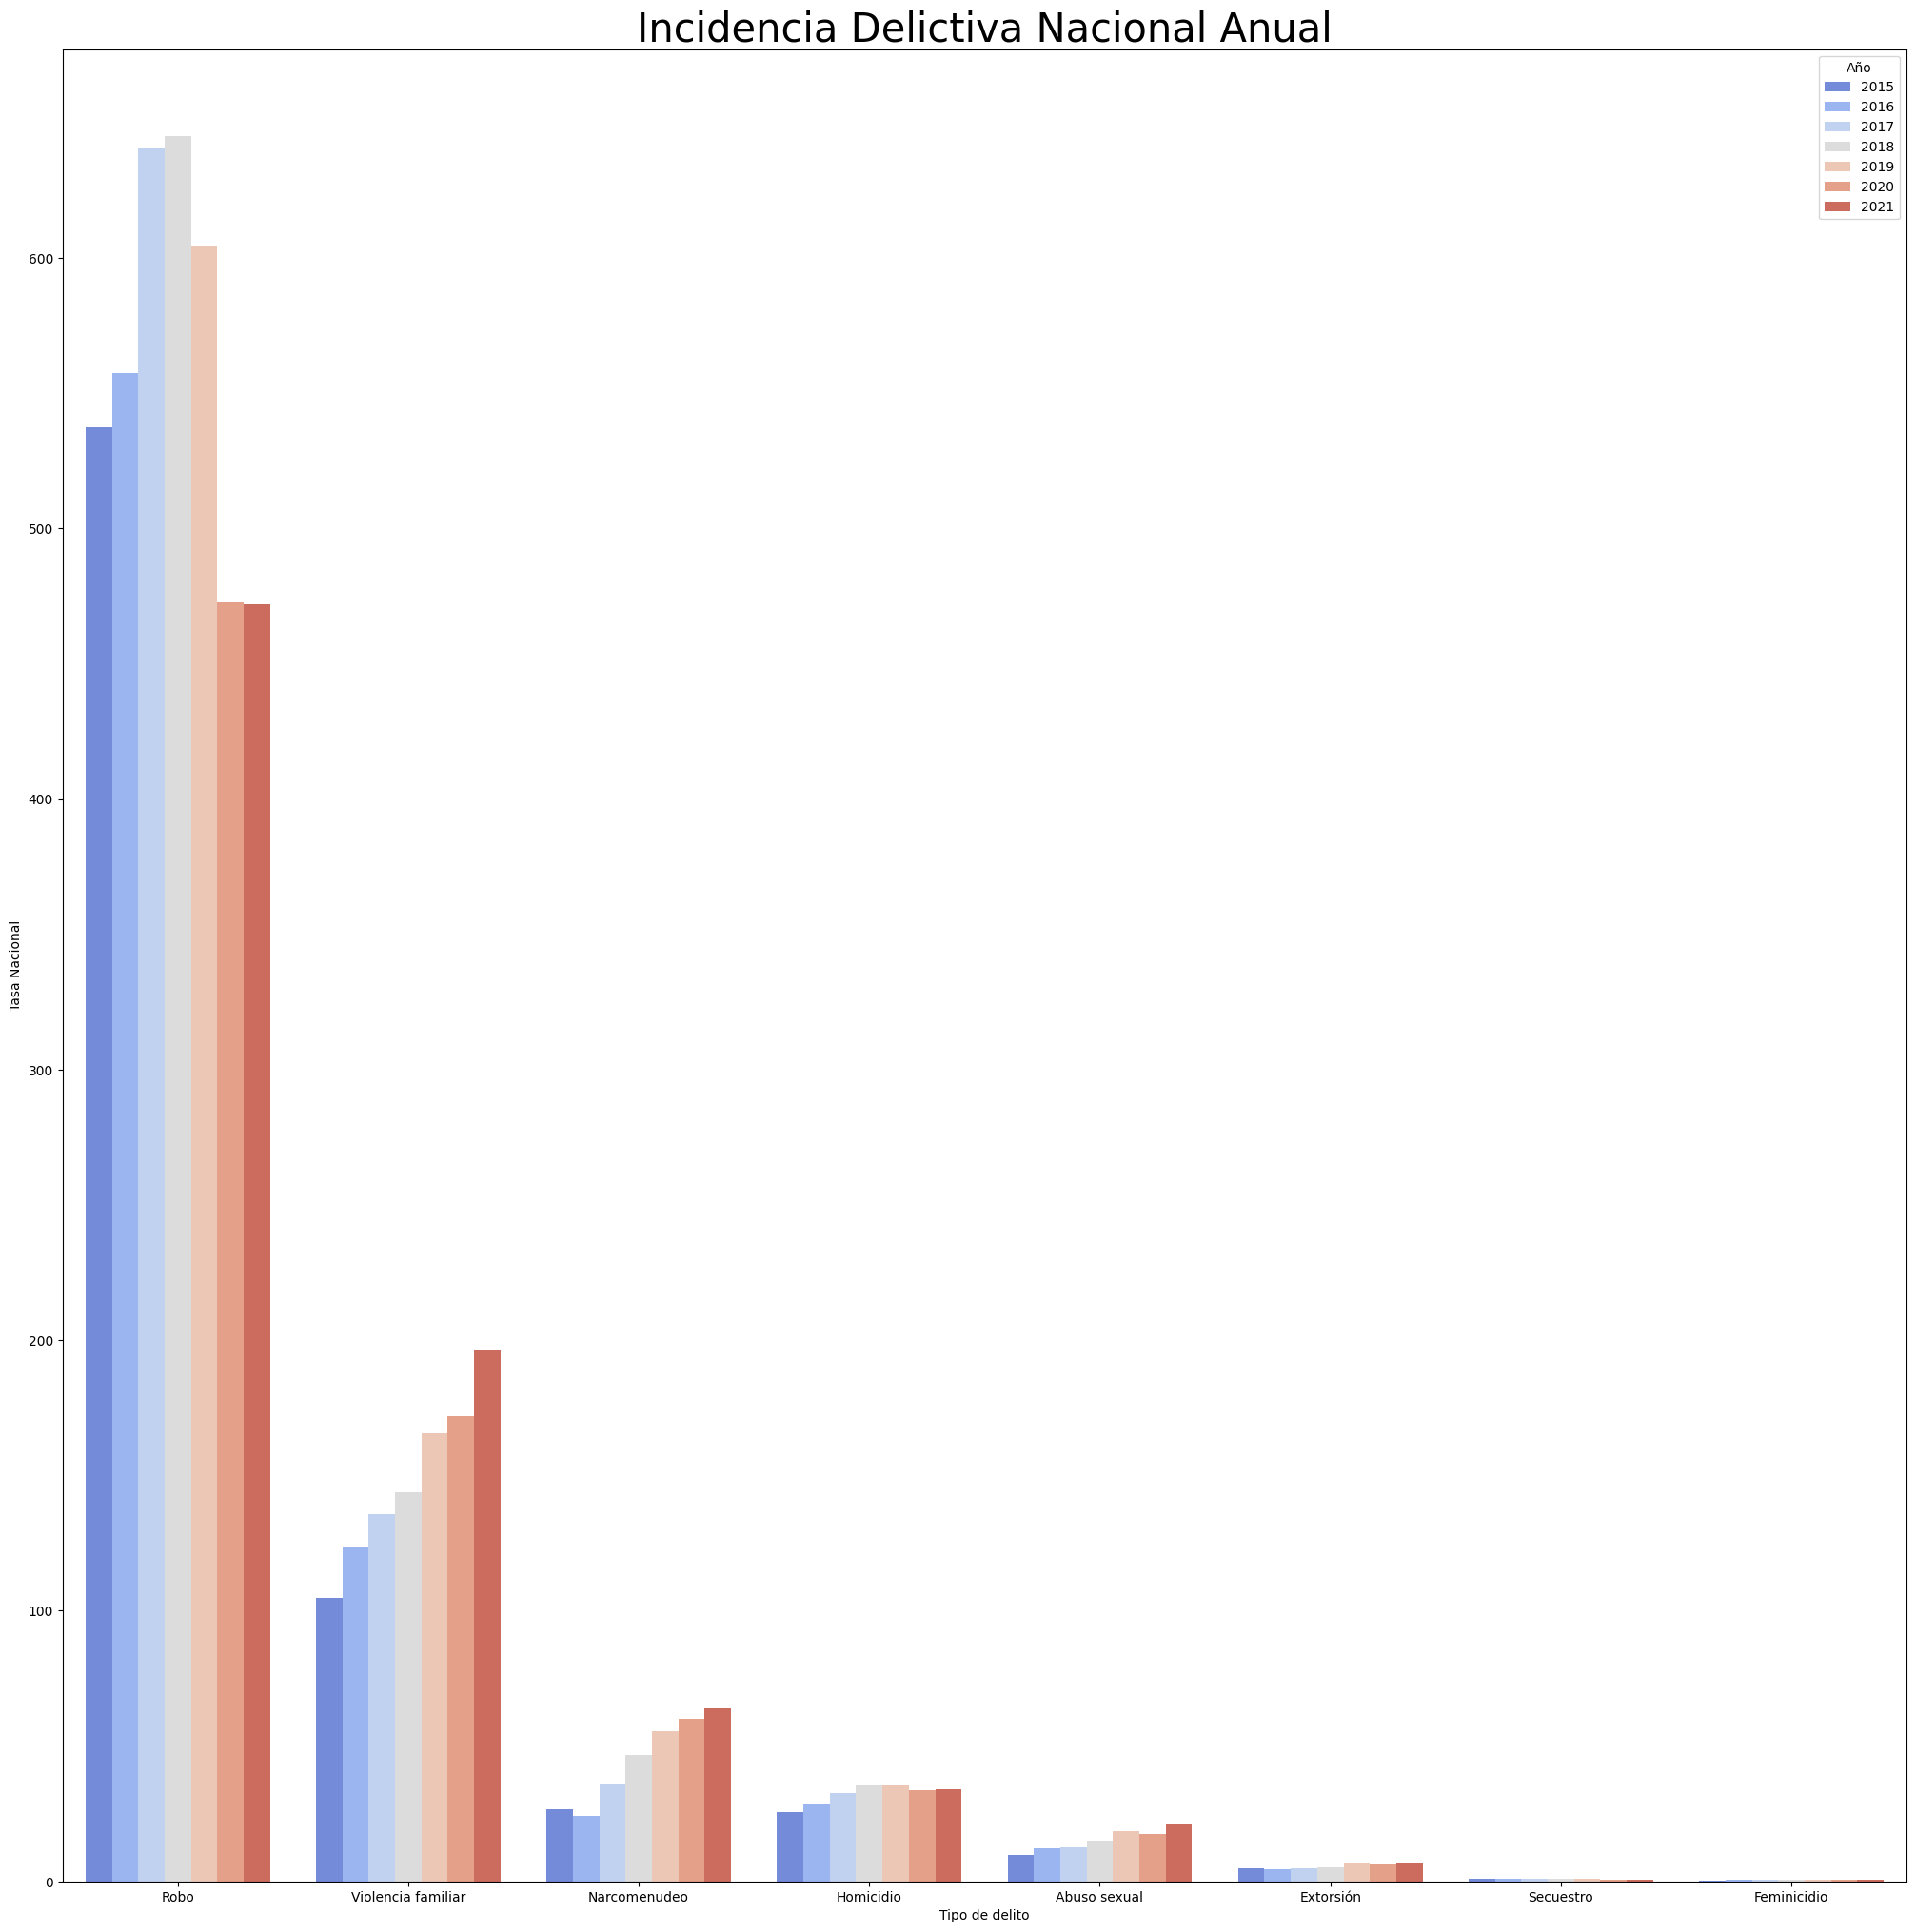

In [213]:
#Tasa nacional anual del periodo 2015-2021
fig1 = plt.figure(figsize=(25,25))
plt.style.use('default')
plt.title('Incidencia Delictiva Nacional Anual',fontsize=30)
sns.barplot(data=tasa_ordenada[tasa_ordenada["Tipo de delito"].isin(["Robo","Homicidio","Narcomenudeo","Violencia familiar","Abuso sexual","Extorsión","Feminicidio","Secuestro"])], x='Tipo de delito',y='Tasa Nacional',hue='Año',palette='coolwarm')

Text(0, 0.5, 'Tasa')

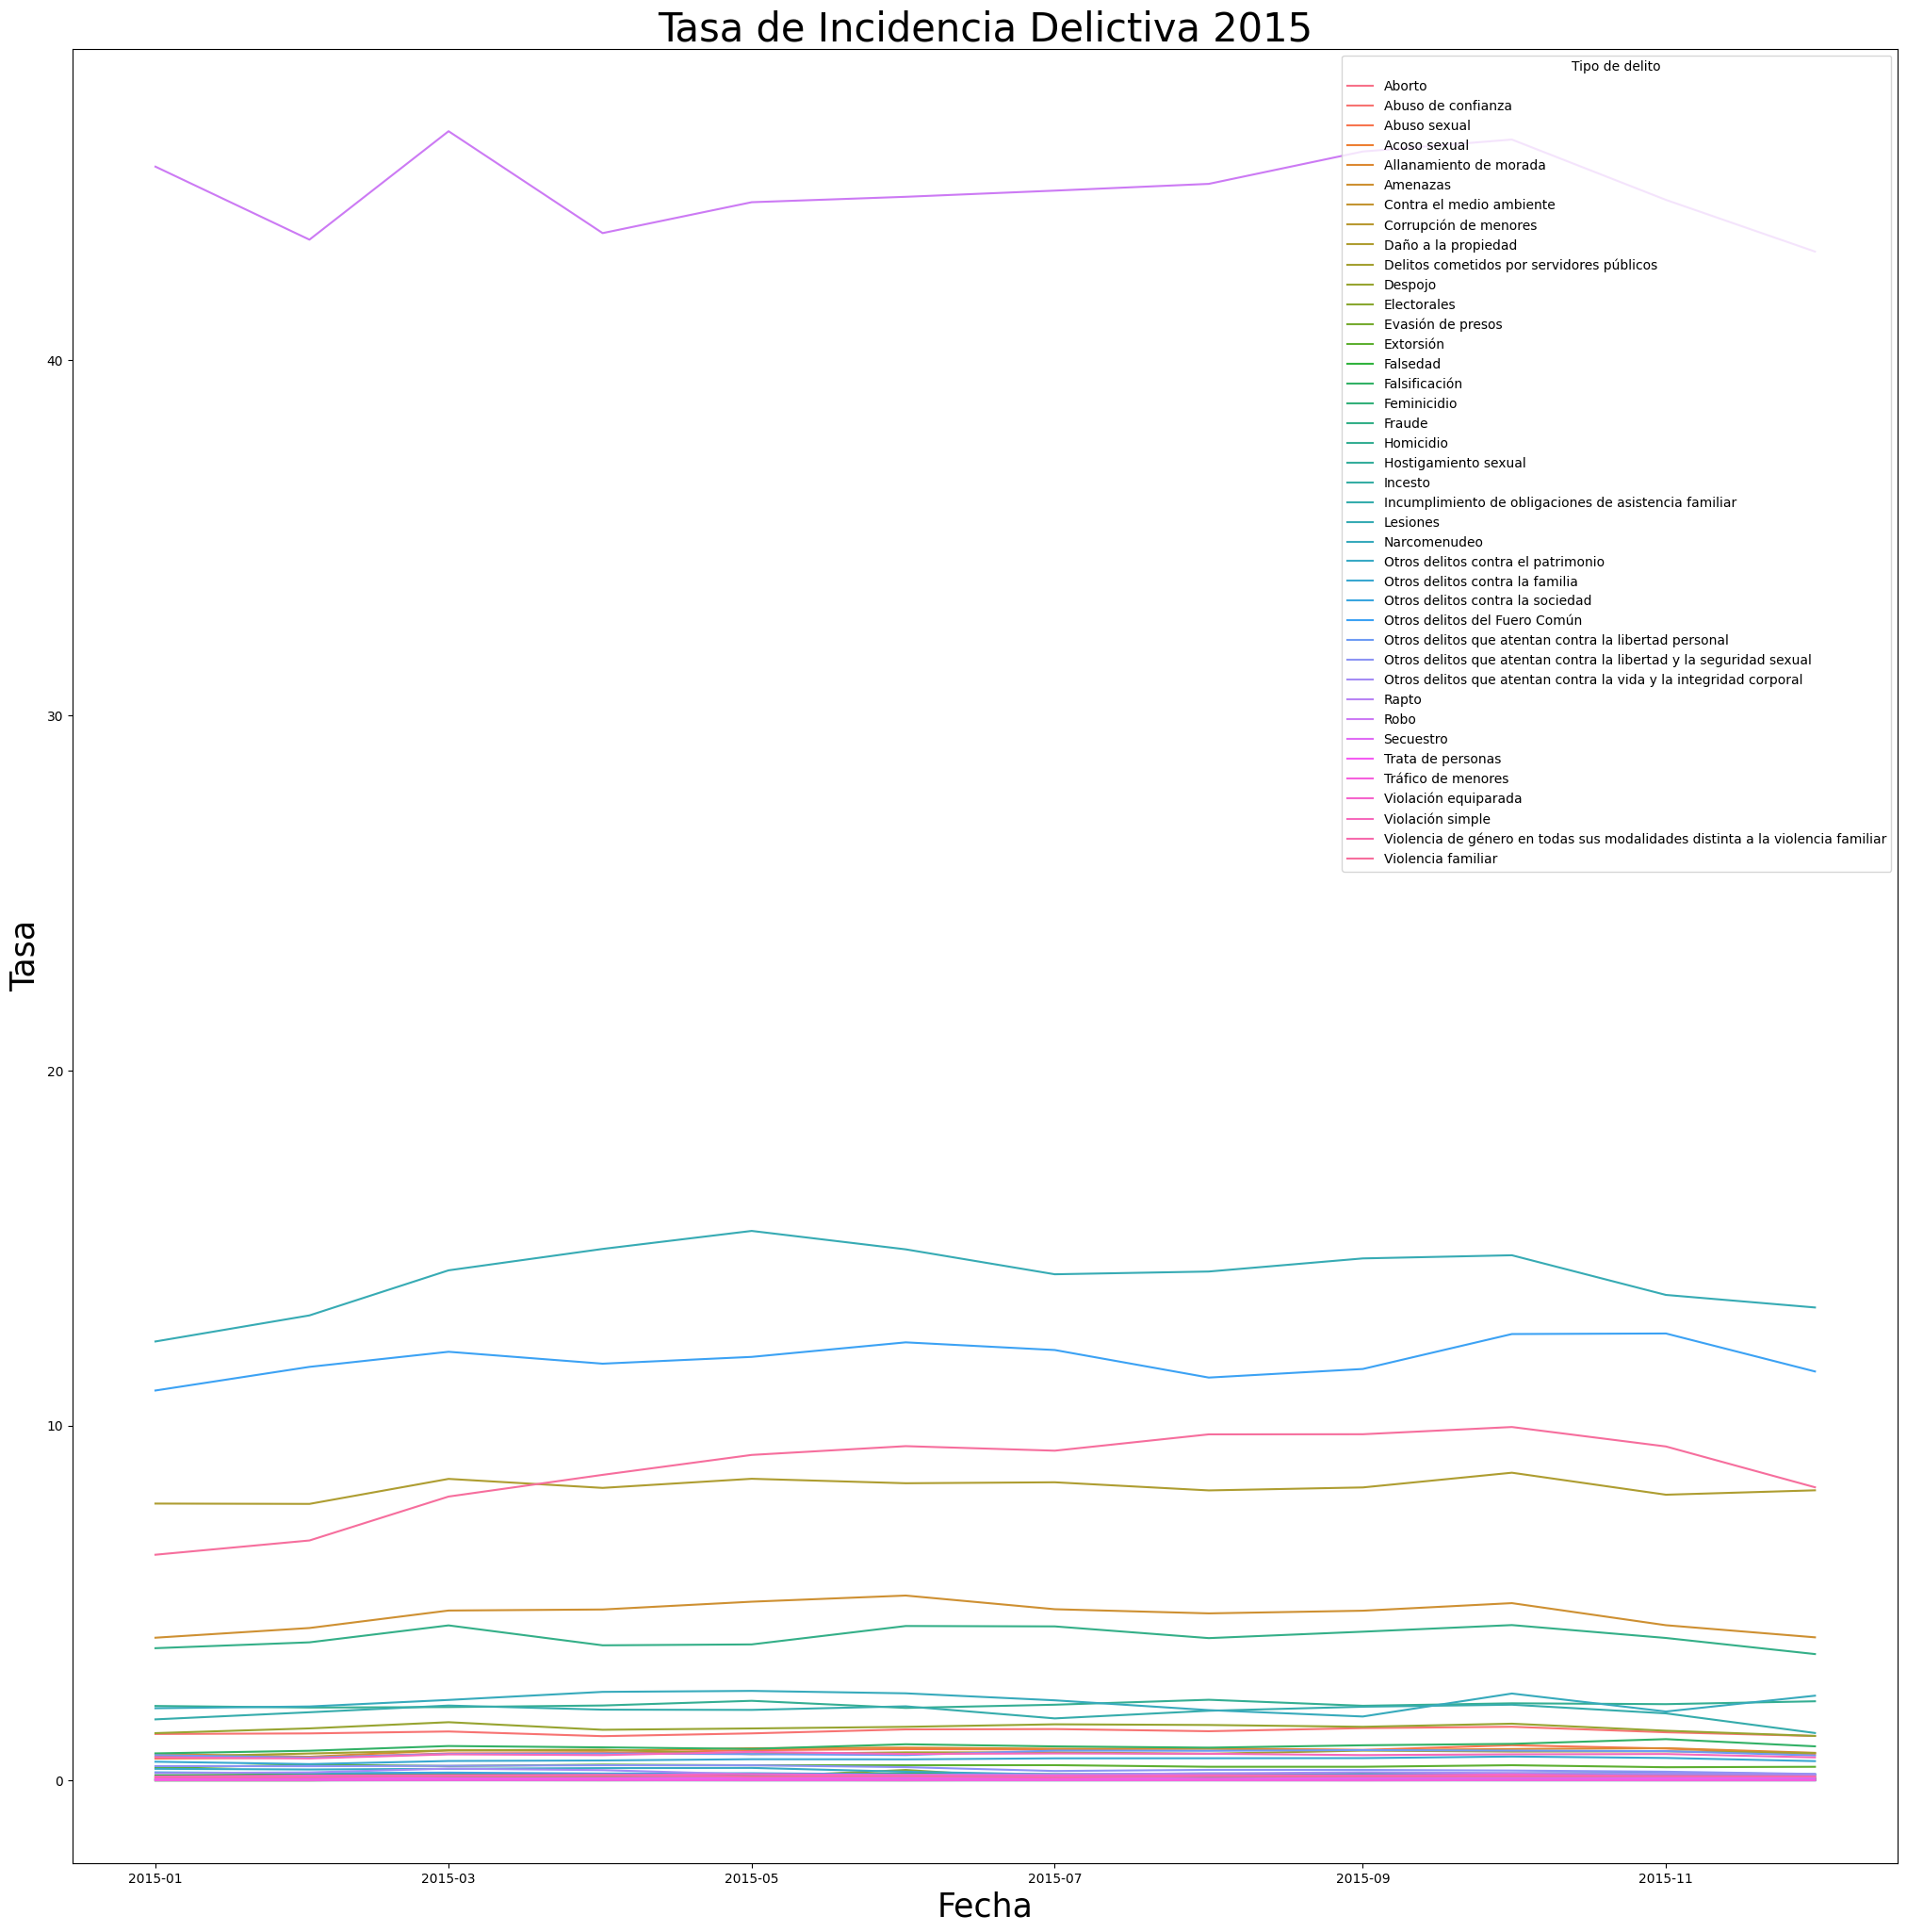

In [220]:
#Tasa Nacional Mensual 2015
plt.figure(figsize=(25,25))
plt.title('Tasa de Incidencia Delictiva 2015',fontsize=30)
sns.lineplot(data=tasa_2015,x='Fecha',y='Tasa Nacional Mes',hue = 'Tipo de delito',ci = None)
plt.xlabel('Fecha',fontsize=25)
plt.ylabel('Tasa',fontsize=25)

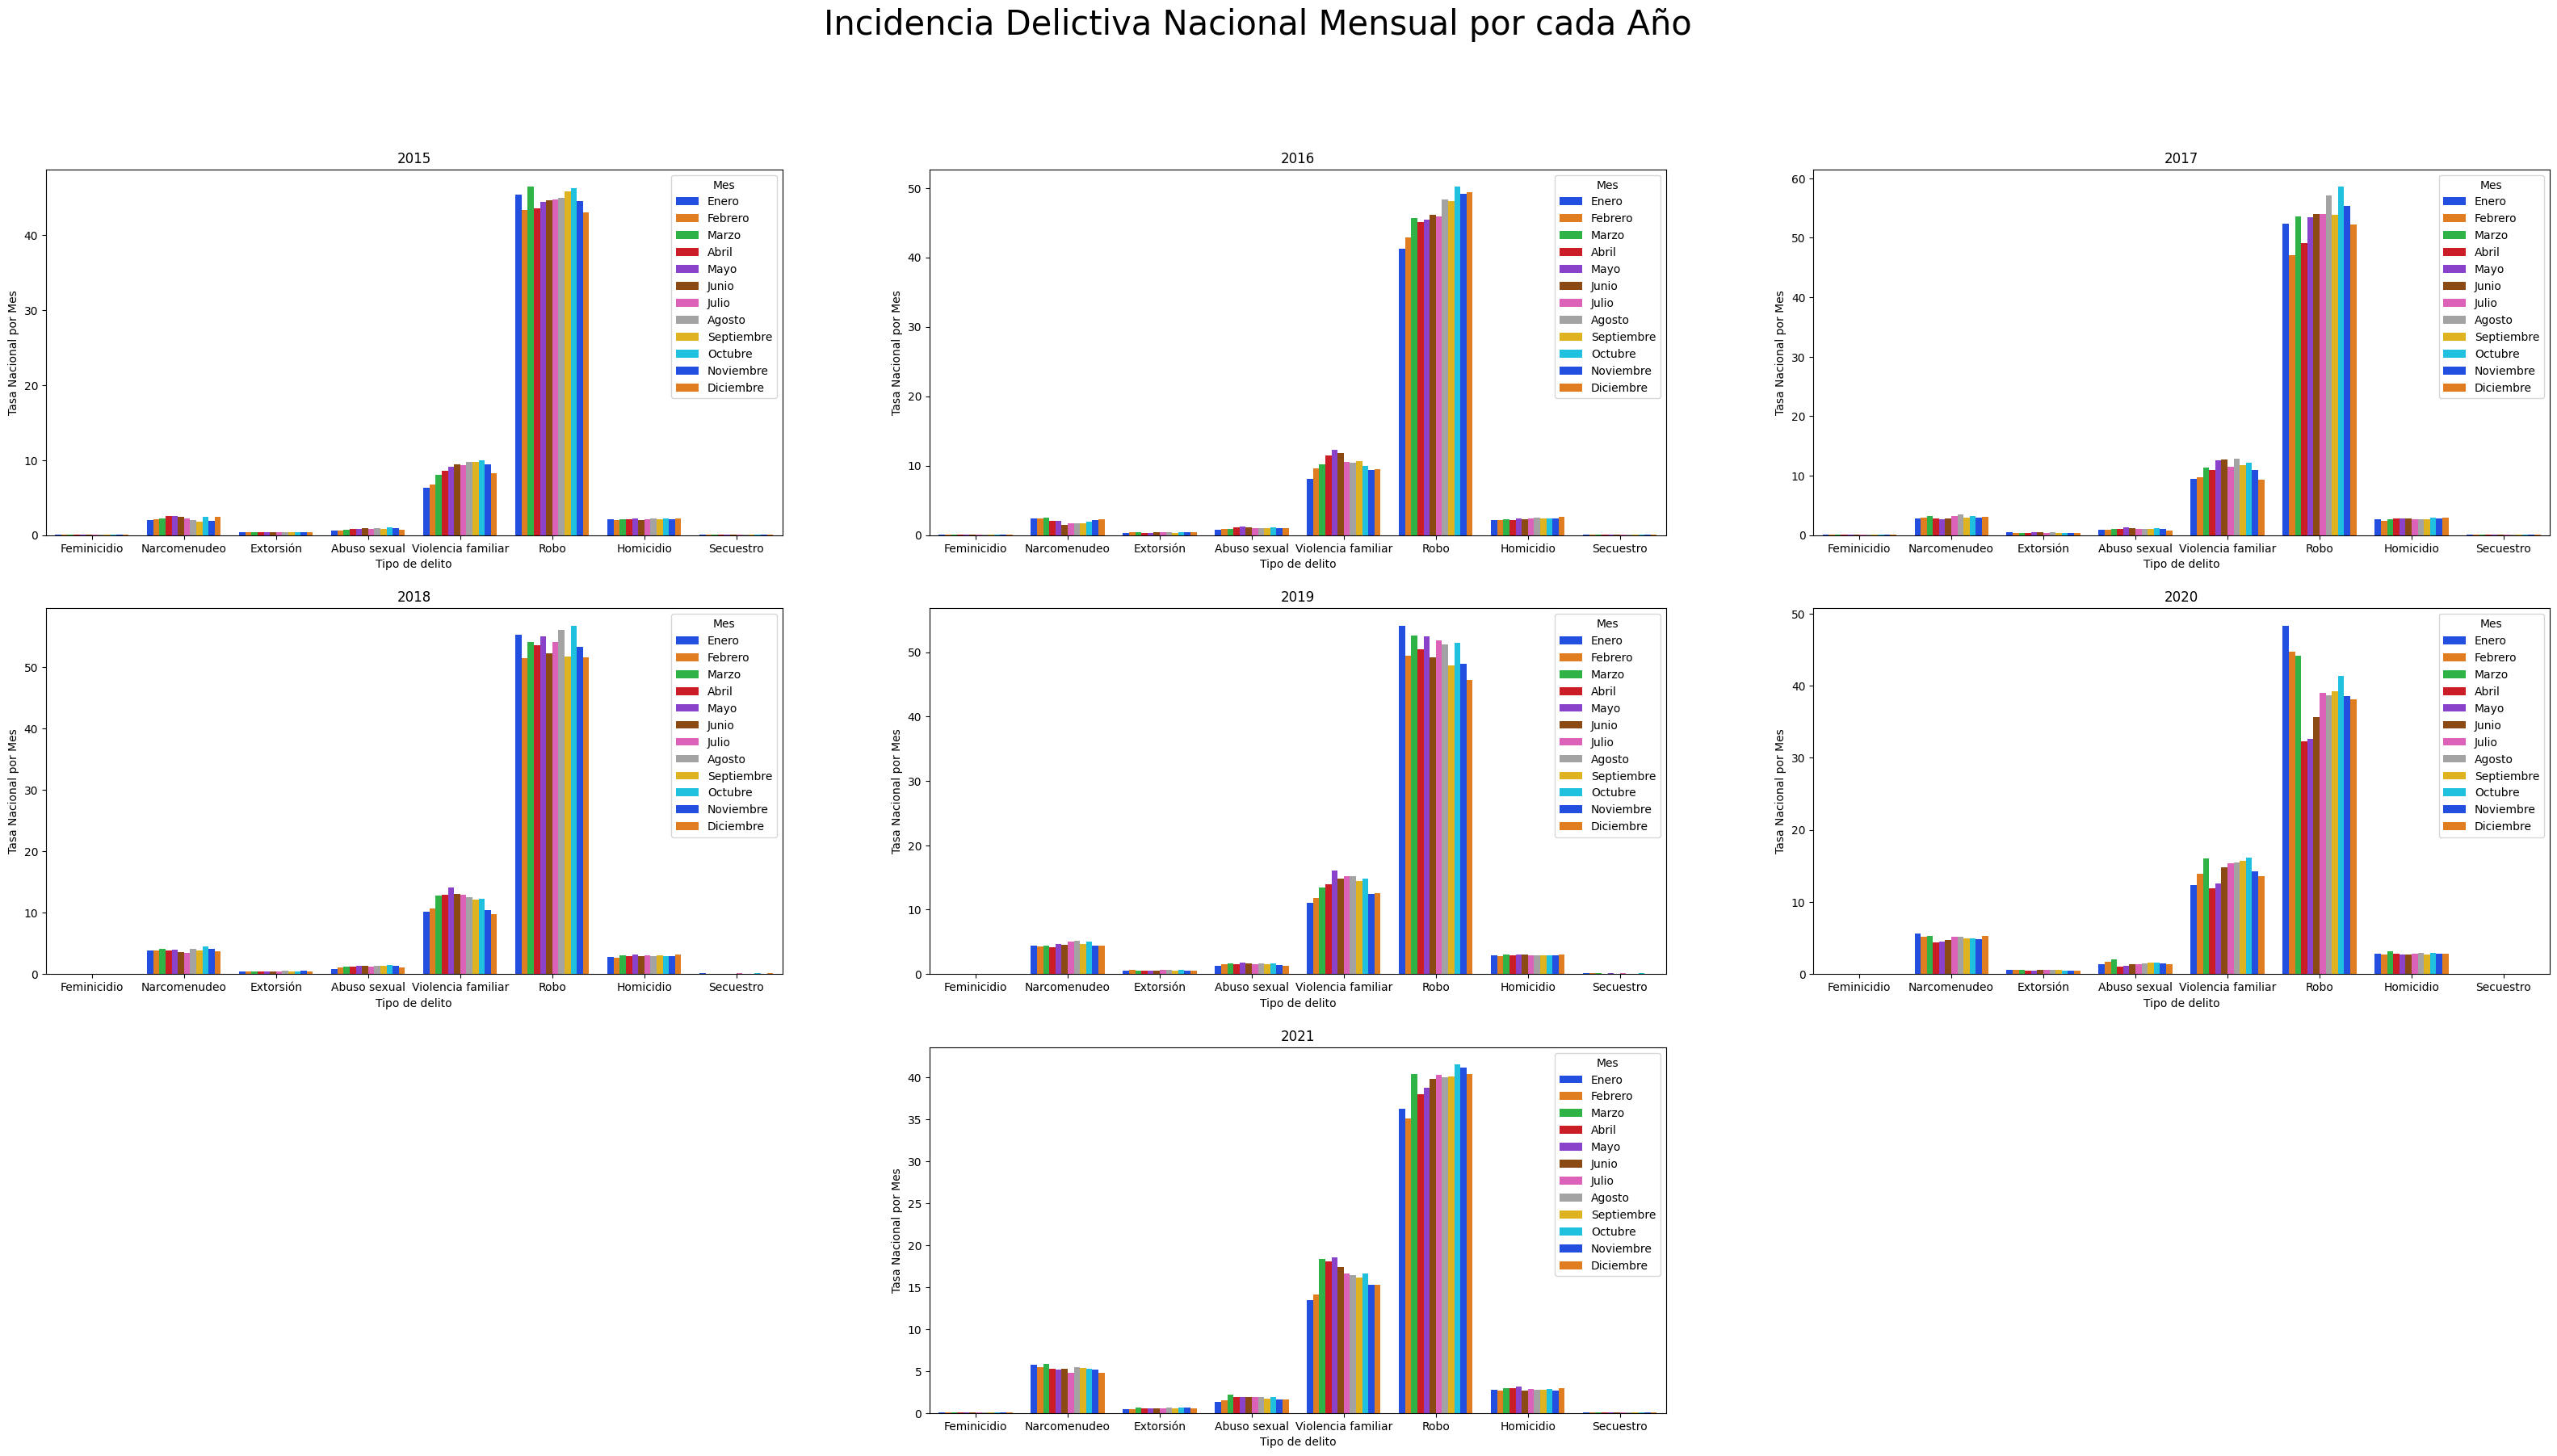

In [264]:
#Tasa nacional seccionada por mes en el periodo 2015-2021
fig,axs=plt.subplots(3,3,figsize=(40,20))
fig.suptitle('Incidencia Delictiva Nacional Mensual por cada Año',fontsize=30)
sns.barplot(data=tasa_2015[tasa_2015["Tipo de delito"].isin(["Robo","Homicidio","Narcomenudeo","Violencia familiar","Abuso sexual","Extorsión","Feminicidio","Secuestro"])], x='Tipo de delito',y='Tasa Nacional Mes',hue='Mes',palette='bright',ax=axs[0,0])
axs[0,0].set(xlabel='Tipo de delito',ylabel='Tasa Nacional por Mes',title='2015')
sns.barplot(data=tasa_2016[tasa_2016["Tipo de delito"].isin(["Robo","Homicidio","Narcomenudeo","Violencia familiar","Abuso sexual","Extorsión","Feminicidio","Secuestro"])], x='Tipo de delito',y='Tasa Nacional Mes',hue='Mes',palette='bright',ax=axs[0,1])
axs[0,1].set(xlabel='Tipo de delito',ylabel='Tasa Nacional por Mes',title='2016')
sns.barplot(data=tasa_2017[tasa_2017["Tipo de delito"].isin(["Robo","Homicidio","Narcomenudeo","Violencia familiar","Abuso sexual","Extorsión","Feminicidio","Secuestro"])], x='Tipo de delito',y='Tasa Nacional Mes',hue='Mes',palette='bright',ax=axs[0,2])
axs[0,2].set(xlabel='Tipo de delito',ylabel='Tasa Nacional por Mes',title='2017')
sns.barplot(data=tasa_2018[tasa_2018["Tipo de delito"].isin(["Robo","Homicidio","Narcomenudeo","Violencia familiar","Abuso sexual","Extorsión","Feminicidio","Secuestro"])], x='Tipo de delito',y='Tasa Nacional Mes',hue='Mes',palette='bright',ax=axs[1,0])
axs[1,0].set(xlabel='Tipo de delito',ylabel='Tasa Nacional por Mes',title='2018')
sns.barplot(data=tasa_2019[tasa_2019["Tipo de delito"].isin(["Robo","Homicidio","Narcomenudeo","Violencia familiar","Abuso sexual","Extorsión","Feminicidio","Secuestro"])], x='Tipo de delito',y='Tasa Nacional Mes',hue='Mes',palette='bright',ax=axs[1,1])
axs[1,1].set(xlabel='Tipo de delito',ylabel='Tasa Nacional por Mes',title='2019')
sns.barplot(data=tasa_2020[tasa_2020["Tipo de delito"].isin(["Robo","Homicidio","Narcomenudeo","Violencia familiar","Abuso sexual","Extorsión","Feminicidio","Secuestro"])], x='Tipo de delito',y='Tasa Nacional Mes',hue='Mes',palette='bright',ax=axs[1,2])
axs[1,2].set(xlabel='Tipo de delito',ylabel='Tasa Nacional por Mes',title='2020')
sns.barplot(data=tasa_2021[tasa_2021["Tipo de delito"].isin(["Robo","Homicidio","Narcomenudeo","Violencia familiar","Abuso sexual","Extorsión","Feminicidio","Secuestro"])], x='Tipo de delito',y='Tasa Nacional Mes',hue='Mes',palette='bright',ax=axs[2,1])
axs[2,1].set(xlabel='Tipo de delito',ylabel='Tasa Nacional por Mes',title='2021')
axs[2,0].set_axis_off()
axs[2,2].set_axis_off()

#ROBO